### Importing necessary Libraries

In [1]:
# Filtering out the warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the required libraries

import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',500)

### Reading the data

In [3]:
# Read the csv file using 'read_csv'. Please write your dataset location here.

df = pd.read_csv(r"C:\Users\Gowtham\Desktop\EDA Case Study\0.Input\application_data.csv")

### Dataframe inspection

In [4]:
# Check the number of rows and columns in the dataframe

df.shape

(307511, 122)

In [5]:
# Print the null percetange of each column of df

df.isnull().sum()/len(df.index)*100

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

In [6]:
# Check the column-wise info of the dataframe

df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   SK_ID_CURR                    int64  
 1   TARGET                        int64  
 2   NAME_CONTRACT_TYPE            object 
 3   CODE_GENDER                   object 
 4   FLAG_OWN_CAR                  object 
 5   FLAG_OWN_REALTY               object 
 6   CNT_CHILDREN                  int64  
 7   AMT_INCOME_TOTAL              float64
 8   AMT_CREDIT                    float64
 9   AMT_ANNUITY                   float64
 10  AMT_GOODS_PRICE               float64
 11  NAME_TYPE_SUITE               object 
 12  NAME_INCOME_TYPE              object 
 13  NAME_EDUCATION_TYPE           object 
 14  NAME_FAMILY_STATUS            object 
 15  NAME_HOUSING_TYPE             object 
 16  REGION_POPULATION_RELATIVE    float64
 17  DAYS_BIRTH                    int64  
 18  DAYS_EMPLOYED          

In [7]:
# Check the summary for the numeric columns 

df.describe(include='all')

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511,307511,307511,307511,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,306219,307511,307511,307511,307511,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,211120,307509.000000,307511.000000,307511.000000,307511,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,97216,153214,159080.000000,151170,161756,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
unique,NaN,NaN,2,3,2,2,NaN,NaN,NaN,NaN,NaN,7,8,5,6,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

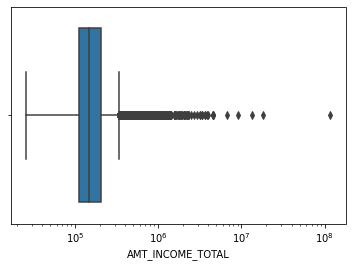

In [8]:
# Checking the AMT_INCOME_TOTAL column using a boxplot for presence of outliers

plt.xscale('log')
sns.boxplot(df.AMT_INCOME_TOTAL,orient='h');

##### There are several outliers beyond the upper whisker but there is one that is very high and is most likely a data inaccuracy, so that data point can be removed for further analysis,

In [9]:
df.AMT_INCOME_TOTAL.sort_values(ascending=False)

12840     117000000.0
203693     18000090.0
246858     13500000.0
77768       9000000.0
131127      6750000.0
             ...     
246104        26100.0
186643        26100.0
240137        26100.0
20727         25650.0
1678          25650.0
Name: AMT_INCOME_TOTAL, Length: 307511, dtype: float64

In [10]:
df.iloc[12840]

SK_ID_CURR                                             114967
TARGET                                                      1
NAME_CONTRACT_TYPE                                 Cash loans
CODE_GENDER                                                 F
FLAG_OWN_CAR                                                N
FLAG_OWN_REALTY                                             Y
CNT_CHILDREN                                                1
AMT_INCOME_TOTAL                                     1.17e+08
AMT_CREDIT                                             562491
AMT_ANNUITY                                           26194.5
AMT_GOODS_PRICE                                        454500
NAME_TYPE_SUITE                                 Unaccompanied
NAME_INCOME_TYPE                                      Working
NAME_EDUCATION_TYPE             Secondary / secondary special
NAME_FAMILY_STATUS                                    Married
NAME_HOUSING_TYPE                           House / apartment
REGION_P

##### As seen in the above information, 'Laborer' has an income of 117000000 which definitely is an outlier, so it needs to removed.

In [11]:
#Excluding the outlier from the dataframe

df=df[df.AMT_INCOME_TOTAL != 117000000.0]

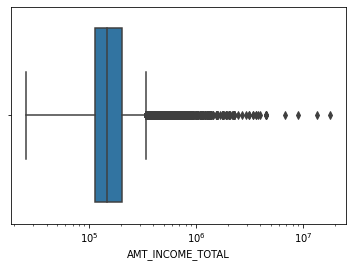

In [12]:
#Sanity Check

plt.xscale('log')
sns.boxplot(df.AMT_INCOME_TOTAL,orient='h');

In [13]:
# Inspect Null values

df.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202928
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [14]:
# Inspect Null values

emptycol = df.isnull().sum()
emptycol.values

array([     0,      0,      0,      0,      0,      0,      0,      0,
            0,     12,    278,   1292,      0,      0,      0,      0,
            0,      0,      0,      0,      0, 202928,      0,      0,
            0,      0,      0,      0,  96391,      2,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0, 173378,    660,  60965, 156061, 179943, 150007, 204487,
       214864, 163891, 154828, 153020, 208641, 182590, 210198, 154350,
       213513, 169681, 156061, 179943, 150007, 204487, 214864, 163891,
       154828, 153020, 208641, 182590, 210198, 154350, 213513, 169681,
       156061, 179943, 150007, 204487, 214864, 163891, 154828, 153020,
       208641, 182590, 210198, 154350, 213513, 169681, 210294, 154297,
       148431, 156341, 145755,   1021,   1021,   1021,   1021,      1,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
      

In [15]:
# Extracting those columns which have more than 40% of null values

emptycol = emptycol[emptycol.values > (0.4 * len(df)) ]
len(emptycol)

49

In [16]:
# Dropping those 49 columns which has greater than 40 % of null values

emptycol = list(emptycol.index)
df.drop(labels = emptycol, axis = 1, inplace=True)
df.shape

(307510, 73)

In [17]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
# Inspect Null values

df.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
O

In [19]:
# Creating a list of columns headers that will server no purpose to the analysis

unwanted_cols = ['NAME_TYPE_SUITE','FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY','FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR','OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_LAST_PHONE_CHANGE',
        'WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION',
        'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY']

In [20]:
# dropping unwanted columns

df.drop(labels = unwanted_cols,axis = 1,inplace = True)

In [21]:
# Check the number of rows and columns in the dataframe
df.shape

(307510, 23)

In [22]:
# Inspect Null values

df.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_ANNUITY                      12
AMT_GOODS_PRICE                 278
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
NAME_HOUSING_TYPE                 0
REGION_POPULATION_RELATIVE        0
DAYS_BIRTH                        0
DAYS_EMPLOYED                     0
DAYS_REGISTRATION                 0
DAYS_ID_PUBLISH                   0
OCCUPATION_TYPE               96391
CNT_FAM_MEMBERS                   2
ORGANIZATION_TYPE                 0
dtype: int64

In [23]:
# 'AMT_ANNUITY has a very low value of missing values, so it can be replaced with the median value'

values= df["AMT_ANNUITY"].median()

df.loc[df["AMT_ANNUITY"].isnull(),"AMT_ANNUITY"] = values

In [24]:
# Inspect Null values

df.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_ANNUITY                       0
AMT_GOODS_PRICE                 278
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
NAME_HOUSING_TYPE                 0
REGION_POPULATION_RELATIVE        0
DAYS_BIRTH                        0
DAYS_EMPLOYED                     0
DAYS_REGISTRATION                 0
DAYS_ID_PUBLISH                   0
OCCUPATION_TYPE               96391
CNT_FAM_MEMBERS                   2
ORGANIZATION_TYPE                 0
dtype: int64

In [25]:
# Check the column-wise info of the dataframe

df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307510 entries, 0 to 307510
Data columns (total 23 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   SK_ID_CURR                  307510 non-null  int64  
 1   TARGET                      307510 non-null  int64  
 2   NAME_CONTRACT_TYPE          307510 non-null  object 
 3   CODE_GENDER                 307510 non-null  object 
 4   FLAG_OWN_CAR                307510 non-null  object 
 5   FLAG_OWN_REALTY             307510 non-null  object 
 6   CNT_CHILDREN                307510 non-null  int64  
 7   AMT_INCOME_TOTAL            307510 non-null  float64
 8   AMT_CREDIT                  307510 non-null  float64
 9   AMT_ANNUITY                 307510 non-null  float64
 10  AMT_GOODS_PRICE             307232 non-null  float64
 11  NAME_INCOME_TYPE            307510 non-null  object 
 12  NAME_EDUCATION_TYPE         307510 non-null  object 
 13  NAME_FAMILY_ST

In [26]:
# changing dtype of DAYS_REGISTRATION

df['DAYS_REGISTRATION'] = df.DAYS_REGISTRATION.astype(int)

In [27]:
# Taking a look at the 'CODE_GENDER' column
df.CODE_GENDER.value_counts()

F      202447
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [28]:
# Only 4 values are 'XNA', so they can replaced with F since that is the highest occuring value in the dataset

df.loc[df["CODE_GENDER"]== "XNA","CODE_GENDER"]= "F"
df["CODE_GENDER"].value_counts()

F    202451
M    105059
Name: CODE_GENDER, dtype: int64

In [29]:
#Taking a look at null values again

df.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_ANNUITY                       0
AMT_GOODS_PRICE                 278
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
NAME_HOUSING_TYPE                 0
REGION_POPULATION_RELATIVE        0
DAYS_BIRTH                        0
DAYS_EMPLOYED                     0
DAYS_REGISTRATION                 0
DAYS_ID_PUBLISH                   0
OCCUPATION_TYPE               96391
CNT_FAM_MEMBERS                   2
ORGANIZATION_TYPE                 0
dtype: int64

In [30]:
# Taking a look at the 'OCCUPATION_TYPE' column

df[df.OCCUPATION_TYPE.isnull()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE
8,100011,0,Cash loans,F,N,Y,0,112500.000,1019610.0,33826.5,913500.0,Pensioner,Secondary / secondary special,Married,House / apartment,0.018634,-20099,365243,-7427,-3514,NaN,2.0,XNA
11,100015,0,Cash loans,F,N,Y,0,38419.155,148365.0,10678.5,135000.0,Pensioner,Secondary / secondary special,Married,House / apartment,0.015221,-20417,365243,-5246,-2512,NaN,2.0,XNA
23,100027,0,Cash loans,F,N,Y,0,83250.000,239850.0,23850.0,225000.0,Pensioner,Secondary / secondary special,Married,House / apartment,0.006296,-24827,365243,-9012,-3684,NaN,2.0,XNA
28,100033,0,Cash loans,M,Y,Y,0,270000.000,790830.0,57676.5,675000.0,State servant,Higher education,Single / not married,House / apartment,0.046220,-9994,-1796,-4668,-2661,NaN,1.0,Military
30,100035,0,Cash loans,F,N,Y,0,292500.000,665892.0,24592.5,477000.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0.025164,-15280,-2668,-5266,-3787,NaN,2.0,Business Entity Type 3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307486,456230,0,Cash loans,F,Y,Y,1,292500.000,355536.0,18283.5,270000.0,Commercial associate,Higher education,Civil marriage,House / apartment,0.072508,-16010,-1185,-5034,-4392,NaN,3.0,Business Entity Type 2
307487,456231,0,Cash loans,M,N,Y,0,117000.000,1071909.0,31473.0,936000.0,Pensioner,Secondary / secondary special,Married,House / apartment,0.010147,-23125,365243,-5485,-4115,NaN,2.0,XNA
307500,456244,0,Cash loans,F,N,Y,0,261000.000,1303812.0,35982.0,1138500.0,Working,Higher education,Married,House / apartment,0.031329,-20390,-5326,-157,-3906,NaN,2.0,Business Entity Type 3
307505,456249,0,Cash loans,F,N,Y,0,112500.000,225000.0,22050.0,225000.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,0.022800,-24384,365243,-7369,-2357,NaN,1.0,XNA


In [31]:
# There are 55374 XNA values out of 307511 which is 18% Hence these values can be imputed with the mode value which is Business Entity Type 3

df.loc[df["OCCUPATION_TYPE"]== "XNA","OCCUPATION_TYPE"]= "Laborers"
df.loc[df["OCCUPATION_TYPE"].isnull(),"OCCUPATION_TYPE"] = df["OCCUPATION_TYPE"].mode()[0]
df["OCCUPATION_TYPE"].value_counts()

Laborers                 151576
Sales staff               32102
Core staff                27570
Managers                  21371
Drivers                   18603
High skill tech staff     11380
Accountants                9813
Medicine staff             8537
Security staff             6721
Cooking staff              5946
Cleaning staff             4653
Private service staff      2652
Low-skill Laborers         2093
Waiters/barmen staff       1348
Secretaries                1305
Realty agents               751
HR staff                    563
IT staff                    526
Name: OCCUPATION_TYPE, dtype: int64

In [32]:
#Looking at null values

df.isnull().sum()

SK_ID_CURR                      0
TARGET                          0
NAME_CONTRACT_TYPE              0
CODE_GENDER                     0
FLAG_OWN_CAR                    0
FLAG_OWN_REALTY                 0
CNT_CHILDREN                    0
AMT_INCOME_TOTAL                0
AMT_CREDIT                      0
AMT_ANNUITY                     0
AMT_GOODS_PRICE               278
NAME_INCOME_TYPE                0
NAME_EDUCATION_TYPE             0
NAME_FAMILY_STATUS              0
NAME_HOUSING_TYPE               0
REGION_POPULATION_RELATIVE      0
DAYS_BIRTH                      0
DAYS_EMPLOYED                   0
DAYS_REGISTRATION               0
DAYS_ID_PUBLISH                 0
OCCUPATION_TYPE                 0
CNT_FAM_MEMBERS                 2
ORGANIZATION_TYPE               0
dtype: int64

In [33]:
df.AMT_GOODS_PRICE.isnull().sum()/len(df)

0.0009040356411173621

##### Since only 0.1% of the values are null, we can impute with median value.

In [34]:
df.loc[df["AMT_GOODS_PRICE"].isnull(),"AMT_GOODS_PRICE"] = df["AMT_GOODS_PRICE"].median()

In [35]:
#Checking null values

df.AMT_GOODS_PRICE.isnull().sum()

0

##### With the "CNT_FAM_MEMBERS" data, very less values are null. So we can directly impute with median as it won't create any bias.

In [36]:
df.loc[df["CNT_FAM_MEMBERS"].isnull(),"CNT_FAM_MEMBERS"] = df["CNT_FAM_MEMBERS"].median()

In [37]:
#Checking null values

df.isnull().sum()

SK_ID_CURR                    0
TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
CNT_CHILDREN                  0
AMT_INCOME_TOTAL              0
AMT_CREDIT                    0
AMT_ANNUITY                   0
AMT_GOODS_PRICE               0
NAME_INCOME_TYPE              0
NAME_EDUCATION_TYPE           0
NAME_FAMILY_STATUS            0
NAME_HOUSING_TYPE             0
REGION_POPULATION_RELATIVE    0
DAYS_BIRTH                    0
DAYS_EMPLOYED                 0
DAYS_REGISTRATION             0
DAYS_ID_PUBLISH               0
OCCUPATION_TYPE               0
CNT_FAM_MEMBERS               0
ORGANIZATION_TYPE             0
dtype: int64

In [38]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648,-2120,Laborers,1.0,Business Entity Type 3
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186,-291,Core staff,2.0,School
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260,-2531,Laborers,1.0,Government
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833,-2437,Laborers,2.0,Business Entity Type 3
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311,-3458,Core staff,1.0,Religion


In [39]:
# Converting negative values into positive values and days to years

days_columns = ["DAYS_BIRTH","DAYS_EMPLOYED",'DAYS_REGISTRATION','DAYS_ID_PUBLISH']
df[days_columns] = df[days_columns].abs()
df[days_columns] = df[days_columns]/365

In [40]:
df[days_columns].describe(include='all')

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
count,307510.000000,307510.000000,307510.000000,307510.000000
mean,43.937003,185.547834,13.660588,8.203288
std,11.956141,382.038155,9.651755,4.135486
min,20.517808,0.000000,0.000000,0.000000
25%,34.008219,2.556164,5.506849,4.712329
50%,43.150685,6.079452,12.339726,8.915068
75%,53.923288,15.635616,20.492466,11.778082
max,69.120548,1000.665753,67.594521,19.717808


##### 1000 years is definitely an anomaly, so the outlier will be capped using the IQR method as shown below

In [41]:
#Removing the outlier based on the above plot in the 'DAYS_EMPLOYED' column

q1=df.DAYS_EMPLOYED.quantile(0.25)
print(q1)
q3=df.DAYS_EMPLOYED.quantile(0.75)
print(q3)
iqr=q3-q1
print(iqr)
lower_whisker=q1-1.5*iqr
print(lower_whisker)
upper_whisker=q3+1.5*iqr
print(upper_whisker)
df = df[df.DAYS_EMPLOYED < upper_whisker]

2.5561643835616437
15.635616438356164
13.07945205479452
-17.063013698630137
35.25479452054795


In [42]:
df[days_columns].describe(include='all')

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
count,251153.000000,251153.000000,251153.000000,251153.000000
mean,40.388649,6.406949,12.661297,7.660089
std,9.980122,6.096347,8.876466,4.151861
min,20.517808,0.000000,0.000000,0.000000
25%,32.230137,2.093151,5.035616,4.060274
50%,39.868493,4.493151,11.660274,7.884932
75%,48.005479,8.632877,18.991781,11.435616
max,68.986301,35.246575,62.194521,19.717808


In [43]:
# change the columns name to year

df.rename(columns={'DAYS_BIRTH': 'YEAR_BIRTH', 'DAYS_EMPLOYED': 'YEAR_EMPLOYED','DAYS_REGISTRATION':"YEAR_REGISTRATION","DAYS_ID_PUBLISH":"YEAR_ID_PUBLISH"}, inplace=True)

In [44]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,YEAR_BIRTH,YEAR_EMPLOYED,YEAR_REGISTRATION,YEAR_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25.920548,1.745205,9.994521,5.808219,Laborers,1.0,Business Entity Type 3
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,45.931507,3.254795,3.249315,0.797260,Core staff,2.0,School
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,52.180822,0.616438,11.671233,6.934247,Laborers,1.0,Government
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,52.068493,8.326027,26.939726,6.676712,Laborers,2.0,Business Entity Type 3
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,54.608219,8.323288,11.810959,9.473973,Core staff,1.0,Religion


In [45]:
categorical_cols = ['TARGET','NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_INCOME_TYPE',
                    'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','OCCUPATION_TYPE',
                    'ORGANIZATION_TYPE']
for col in categorical_cols:
    df[col] = df[col].astype('category')
    
df['SK_ID_CURR'] = df['SK_ID_CURR'].astype('object')

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 251153 entries, 0 to 307510
Data columns (total 23 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   SK_ID_CURR                  251153 non-null  object  
 1   TARGET                      251153 non-null  category
 2   NAME_CONTRACT_TYPE          251153 non-null  category
 3   CODE_GENDER                 251153 non-null  category
 4   FLAG_OWN_CAR                251153 non-null  category
 5   FLAG_OWN_REALTY             251153 non-null  category
 6   CNT_CHILDREN                251153 non-null  int64   
 7   AMT_INCOME_TOTAL            251153 non-null  float64 
 8   AMT_CREDIT                  251153 non-null  float64 
 9   AMT_ANNUITY                 251153 non-null  float64 
 10  AMT_GOODS_PRICE             251153 non-null  float64 
 11  NAME_INCOME_TYPE            251153 non-null  category
 12  NAME_EDUCATION_TYPE         251153 non-null  category
 13 

### Derived Metrics

In [47]:
# Creating bins for the income parameter

bins_in = [0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,
        275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,
        10000000000]
slot_in = ['0-25000', '25000-50000','50000-75000','75000,100000','100000-125000',
       '125000-150000', '150000-175000','175000-200000','200000-225000',
        '225000-250000','250000-275000','275000-300000','300000-325000',
        '325000-350000','350000-375000','375000-400000','400000-425000',
        '425000-450000','450000-475000','475000-500000','500000 and above']

In [48]:
#Binning the 'AMT_INCOME_TOTAL' since its a continuous variable:

df['AMT_INCOME_RANGE']=pd.cut(df['AMT_INCOME_TOTAL'], bins_in, labels=slot_in)

In [49]:
# Creating bins for the Credit parameter

bins_cr = [0,150000,200000,250000,300000,350000,400000,450000,500000,550000,
           600000,650000,700000,750000,800000,850000,900000,1000000]
print(len(bins_cr))
slots_cr = ['0-150000', '150000-200000','200000-250000', '250000-300000', 
            '300000-350000', '350000-400000','400000-450000','450000-500000',
            '500000-550000','550000-600000','600000-650000','650000-700000',
            '700000-750000','750000-800000','800000-850000','850000-900000',
            '900000 and above']
print(len(slots_cr))

18
17


In [50]:
#Binning the 'AMT_CREDIT' since its a continuous variable:

df['AMT_CREDIT_RANGE']=pd.cut(df['AMT_CREDIT'],bins=bins_cr,labels=slots_cr)

In [51]:
# Creating bins for the age parameter

bins_age = [18,40,60,100]
slots_age = ['18-40','41-60','60 and above']

In [52]:
df['YEAR_BIRTH_RANGE']=pd.cut(df['YEAR_BIRTH'], bins=bins_age, labels=slots_age)

In [53]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,YEAR_BIRTH,YEAR_EMPLOYED,YEAR_REGISTRATION,YEAR_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,AMT_INCOME_RANGE,AMT_CREDIT_RANGE,YEAR_BIRTH_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25.920548,1.745205,9.994521,5.808219,Laborers,1.0,Business Entity Type 3,200000-225000,400000-450000,18-40
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,45.931507,3.254795,3.249315,0.797260,Core staff,2.0,School,250000-275000,NaN,41-60
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,52.180822,0.616438,11.671233,6.934247,Laborers,1.0,Government,50000-75000,0-150000,41-60
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,52.068493,8.326027,26.939726,6.676712,Laborers,2.0,Business Entity Type 3,125000-150000,300000-350000,41-60
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,54.608219,8.323288,11.810959,9.473973,Core staff,1.0,Religion,100000-125000,500000-550000,41-60


### Splitting the dataset into two categories

### 1. Target = 1 (Clients with payment difficulties)
### 2. Target = 0 (Clients with no payment difficulties)

In [54]:
target1_df = df.loc[df["TARGET"]==1]
target0_df = df.loc[df["TARGET"]==0]

#### Inspecting the new dataframe

### TARGET = 1 (Clients with payment difficulties)

In [55]:
#Taking a look at the first dataframe

target1_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,YEAR_BIRTH,YEAR_EMPLOYED,YEAR_REGISTRATION,YEAR_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,AMT_INCOME_RANGE,AMT_CREDIT_RANGE,YEAR_BIRTH_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25.920548,1.745205,9.994521,5.808219,Laborers,1.0,Business Entity Type 3,200000-225000,400000-450000,18-40
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,702000.0,Working,Secondary / secondary special,Widow,House / apartment,0.018029,51.298630,7.200000,18.008219,5.005479,Cooking staff,1.0,Business Entity Type 3,100000-125000,900000 and above,41-60
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,855000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,47.895890,3.457534,3.238356,2.819178,Laborers,2.0,Business Entity Type 3,200000-225000,NaN,41-60
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,238500.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.007305,36.668493,9.854795,0.123288,12.079452,Sales staff,2.0,Self-employed,125000-150000,250000-300000,18-40
94,100112,1,Cash loans,M,Y,Y,0,315000.0,953460.0,64107.0,900000.0,Commercial associate,Incomplete higher,Single / not married,With parents,0.030755,27.942466,5.520548,13.156164,2.843836,Laborers,1.0,Industry: type 4,300000-325000,900000 and above,18-40


In [56]:
#Checking the shape

target1_df.shape

(21819, 26)

In [57]:
target1_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21819 entries, 0 to 307509
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   SK_ID_CURR                  21819 non-null  object  
 1   TARGET                      21819 non-null  category
 2   NAME_CONTRACT_TYPE          21819 non-null  category
 3   CODE_GENDER                 21819 non-null  category
 4   FLAG_OWN_CAR                21819 non-null  category
 5   FLAG_OWN_REALTY             21819 non-null  category
 6   CNT_CHILDREN                21819 non-null  int64   
 7   AMT_INCOME_TOTAL            21819 non-null  float64 
 8   AMT_CREDIT                  21819 non-null  float64 
 9   AMT_ANNUITY                 21819 non-null  float64 
 10  AMT_GOODS_PRICE             21819 non-null  float64 
 11  NAME_INCOME_TYPE            21819 non-null  category
 12  NAME_EDUCATION_TYPE         21819 non-null  category
 13  NAME_FAMILY_STA

In [58]:
target1_df.describe(include='all')

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,YEAR_BIRTH,YEAR_EMPLOYED,YEAR_REGISTRATION,YEAR_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,AMT_INCOME_RANGE,AMT_CREDIT_RANGE,YEAR_BIRTH_RANGE
count,21819.0,21819.0,21819,21819,21819,21819,21819.000000,2.181900e+04,2.181900e+04,21819.000000,2.181900e+04,21819,21819,21819,21819,21819.000000,21819.000000,21819.000000,21819.000000,21819.000000,21819,21819.000000,21819,21819,19222,21819
unique,21819.0,1.0,2,2,2,2,NaN,NaN,NaN,NaN,NaN,4,5,5,6,NaN,NaN,NaN,NaN,NaN,18,NaN,57,20,17,3
top,196607.0,1.0,Cash loans,F,N,Y,NaN,NaN,NaN,NaN,NaN,Working,Secondary / secondary special,Married,House / apartment,NaN,NaN,NaN,NaN,NaN,Laborers,NaN,Business Entity Type 3,125000-150000,250000-300000,18-40
freq,1.0,21819.0,20355,11908,14740,14711,NaN,NaN,NaN,NaN,NaN,15212,16987,13179,18456,NaN,NaN,NaN,NaN,NaN,9119,NaN,6320,3593,2256,12967
mean,NaN,NaN,NaN,NaN,NaN,NaN,0.517989,1.644050e+05,5.576072e+05,26859.635639,4.882399e+05,NaN,NaN,NaN,NaN,0.019065,38.306212,4.949821,11.644358,7.131562,NaN,2.247262,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,0.782277,8.853259e+04,3.460076e+05,12478.328005,3.106022e+05,NaN,NaN,NaN,NaN,0.011852,9.679065,4.994922,8.460452,4.120358,NaN,0.972135,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,2.700000e+04,4.500000e+04,2844.000000,4.500000e+04,NaN,NaN,NaN,NaN,0.000533,21.035616,0.000000,0.000000,0.000000,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.125000e+05,2.844000e+05,17716.500000,2.385000e+05,NaN,NaN,NaN,NaN,0.009630,30.369863,1.624658,4.246575,3.506849,NaN,2.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.440000e+05,4.958910e+05,25578.000000,4.500000e+05,NaN,NaN,NaN,NaN,0.018634,37.265753,3.367123,10.704110,7.115068,NaN,2.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,2.025000e+05,7.288470e+05,33394.500000,6.750000e+05,NaN,NaN,NaN,NaN,0.025164,45.439726,6.509589,17.241096,11.008219,NaN,3.000000,NaN,NaN,NaN,NaN


### Target = 0 (Clients with no payment difficulties)

#### Inspecting the dataframe

In [59]:
#Taking a look at the second dataframe

target0_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,YEAR_BIRTH,YEAR_EMPLOYED,YEAR_REGISTRATION,YEAR_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,AMT_INCOME_RANGE,AMT_CREDIT_RANGE,YEAR_BIRTH_RANGE
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,45.931507,3.254795,3.249315,0.797260,Core staff,2.0,School,250000-275000,NaN,41-60
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,52.180822,0.616438,11.671233,6.934247,Laborers,1.0,Government,50000-75000,0-150000,41-60
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,52.068493,8.326027,26.939726,6.676712,Laborers,2.0,Business Entity Type 3,125000-150000,300000-350000,41-60
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,54.608219,8.323288,11.810959,9.473973,Core staff,1.0,Religion,100000-125000,500000-550000,41-60
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,State servant,Secondary / secondary special,Married,House / apartment,0.035792,46.413699,4.350685,13.616438,1.306849,Laborers,2.0,Other,"75000,100000",450000-500000,41-60


In [60]:
target0_df.shape

(229334, 26)

In [61]:
target0_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229334 entries, 1 to 307510
Data columns (total 26 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   SK_ID_CURR                  229334 non-null  object  
 1   TARGET                      229334 non-null  category
 2   NAME_CONTRACT_TYPE          229334 non-null  category
 3   CODE_GENDER                 229334 non-null  category
 4   FLAG_OWN_CAR                229334 non-null  category
 5   FLAG_OWN_REALTY             229334 non-null  category
 6   CNT_CHILDREN                229334 non-null  int64   
 7   AMT_INCOME_TOTAL            229334 non-null  float64 
 8   AMT_CREDIT                  229334 non-null  float64 
 9   AMT_ANNUITY                 229334 non-null  float64 
 10  AMT_GOODS_PRICE             229334 non-null  float64 
 11  NAME_INCOME_TYPE            229334 non-null  category
 12  NAME_EDUCATION_TYPE         229334 non-null  category
 13 

In [62]:
target0_df.describe(include='all')

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,YEAR_BIRTH,YEAR_EMPLOYED,YEAR_REGISTRATION,YEAR_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,AMT_INCOME_RANGE,AMT_CREDIT_RANGE,YEAR_BIRTH_RANGE
count,229334.0,229334.0,229334,229334,229334,229334,229334.000000,2.293340e+05,2.293340e+05,229334.000000,2.293340e+05,229334,229334,229334,229334,229334.000000,229334.000000,229334.000000,229334.000000,229334.000000,229334,229334.000000,229334,229334,189009,229334
unique,229334.0,1.0,2,2,2,2,NaN,NaN,NaN,NaN,NaN,7,5,6,6,NaN,NaN,NaN,NaN,NaN,18,NaN,57,20,17,3
top,456255.0,0.0,Cash loans,F,N,Y,NaN,NaN,NaN,NaN,NaN,Working,Secondary / secondary special,Married,House / apartment,NaN,NaN,NaN,NaN,NaN,Laborers,NaN,Business Entity Type 3,125000-150000,250000-300000,18-40
freq,1.0,229334.0,204969,144502,142199,155632,NaN,NaN,NaN,NaN,NaN,142954,155553,150098,201111,NaN,NaN,NaN,NaN,NaN,86685,NaN,61590,36066,22618,113723
mean,NaN,NaN,NaN,NaN,NaN,NaN,0.498692,1.764856e+05,6.162766e+05,27899.308009,5.548635e+05,NaN,NaN,NaN,NaN,0.021066,40.586773,6.545581,12.758050,7.710374,NaN,2.255287,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,0.762155,1.155853e+05,4.112813e+05,14832.042756,3.777993e+05,NaN,NaN,NaN,NaN,0.014038,9.985715,6.173054,8.909006,4.151350,NaN,0.939971,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,2.565000e+04,4.500000e+04,1980.000000,4.050000e+04,NaN,NaN,NaN,NaN,0.000290,20.517808,0.000000,0.000000,0.000000,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.125000e+05,2.762775e+05,16969.500000,2.475000e+05,NaN,NaN,NaN,NaN,0.010006,32.446575,2.153425,5.104110,4.120548,NaN,2.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.575000e+05,5.212800e+05,25843.500000,4.500000e+05,NaN,NaN,NaN,NaN,0.018850,40.128767,4.613699,11.753425,7.964384,NaN,2.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,2.160000e+05,8.353800e+05,35743.500000,7.020000e+05,NaN,NaN,NaN,NaN,0.028663,48.221918,8.841096,19.142466,11.473973,NaN,3.000000,NaN,NaN,NaN,NaN


In [63]:
# Finding the imbalance percentage

imbalance_percentage = round(len(target1_df)/len(target0_df),4)*100
imbalance_percentage

9.51

In [138]:
# Finding the imbalance ratio

imbalance_ratio = round(len(target0_df)/len(target1_df),2)
imbalance_ratio

10.51

#### Observation: 9.5% of the total population in the given dataset have difficulties in paying off their credits, i.e., they are the clients that have payment difficulties

### Type of loan Vs Gender of Client

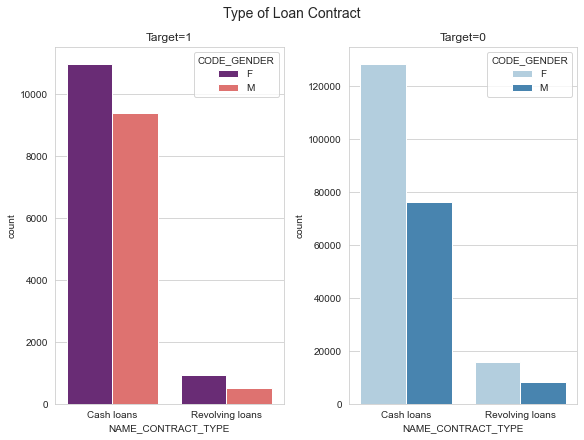

In [64]:
#Creating a barplot to see the relationship between the type of loan and the gender of client

sns.set_style('whitegrid')

fig, ax = plt.subplots(1,2,constrained_layout=True,figsize=(8,6))

ax[0].set_title('Target=1',fontsize=12)
sns.countplot(data=target1_df,x='NAME_CONTRACT_TYPE',hue='CODE_GENDER',
              palette='magma',ax=ax[0])

ax[1].set_title('Target=0',fontsize=12)
sns.countplot(data=target0_df,x='NAME_CONTRACT_TYPE',hue='CODE_GENDER',
              palette='Blues',ax=ax[1])


plt.suptitle('Type of Loan Contract',fontsize=14)
plt.show()

##### Observations: 
1. Cash loans is popular among both set of clients.
2. Revolving loans seems very less popular. 
3. Females are leading the numbers, again in both cases.

### Type of Loan Vs Age of Client

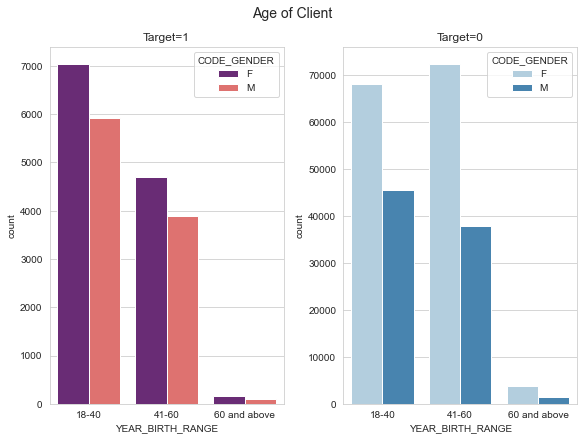

In [65]:
#Creating a barplot between type of loan the age of client

sns.set_style('whitegrid')

fig, ax = plt.subplots(1,2,constrained_layout=True,figsize=(8,6))

ax[0].set_title('Target=1',fontsize=12)
sns.countplot(data=target1_df,x='YEAR_BIRTH_RANGE',hue='CODE_GENDER',
              palette='magma',ax=ax[0])

ax[1].set_title('Target=0',fontsize=12)
sns.countplot(data=target0_df,x='YEAR_BIRTH_RANGE',hue='CODE_GENDER',
              palette='Blues',ax=ax[1])


plt.suptitle('Age of Client',fontsize=14)
plt.show()

##### Observations:
1. Ages 18-40 have the higest number of loans, this could be because that's when most people graduate or start a new job and would want extra funds. 
2. The difference in gender in the ages 18-40 is more or less in both cases whereas for ages 41-60, females tend to have lesser difficulties in payments.
3. Clients of age 60 and above have taken very few loans as most of them would be living on pension.

### Income range Vs Gender of Client

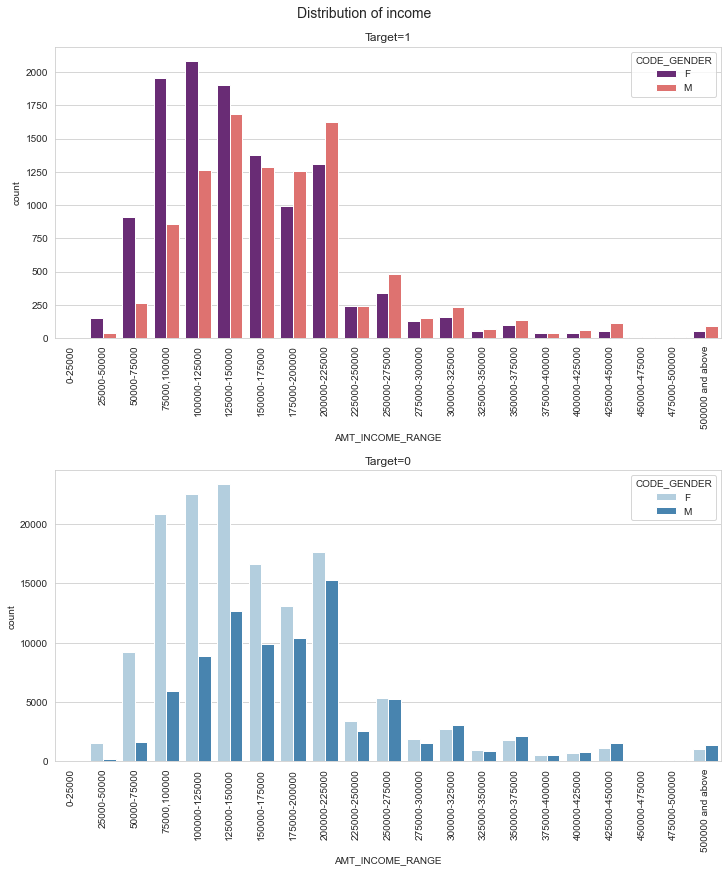

In [66]:
#Plotting the distribution of income in both categories and seeing the relationship between the two genders

sns.set_style('whitegrid')

fig, ax = plt.subplots(2,1,constrained_layout=True, figsize=(10,12))

ax[0].set_title('Target=1', fontsize=12)
ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation=90)
sns.countplot(data=target1_df,x='AMT_INCOME_RANGE',hue='CODE_GENDER',
              palette='magma',ax=ax[0])

ax[1].set_title('Target=0',fontsize=12)
ax[1].set_xticklabels(ax[1].get_xticklabels(),rotation=90)
sns.countplot(data=target0_df,x='AMT_INCOME_RANGE',hue='CODE_GENDER',
              palette='Blues',ax=ax[1])


plt.suptitle('Distribution of income',fontsize=14)
plt.show()

##### Observations:
1. The overall distribution of income in both categories is more or less the same.
2. Clients who have payment difficulties (Target=1) are more or less, in terms of gender distribution except for one range 75000 to 125000 where females are facing more difficulty. 
3. For clients who have no difficulty in payments (Target=0), females are more in number. Men seem to have diffculites in their payments.

### Amount of credit Vs Gender of Client

sns.set_style('whitegrid')

fig, ax = plt.subplots(2,1,constrained_layout=True, figsize=(10,12))

ax[0].set_title('Target=1', fontsize=12)
ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation=90)
sns.countplot(data=target1_df,x='AMT_CREDIT',hue='CODE_GENDER',
              palette='magma',ax=ax[0])

ax[1].set_title('Target=0',fontsize=12)
ax[1].set_xticklabels(ax[0].get_xticklabels(),rotation=90)
sns.countplot(data=target0_df,x='AMT_CREDIT',hue='CODE_GENDER',
              palette='Blues',ax=ax[1])


plt.suptitle('Distribution of Credit amount',fontsize=14)

plt.show()

### Income Type Distribution

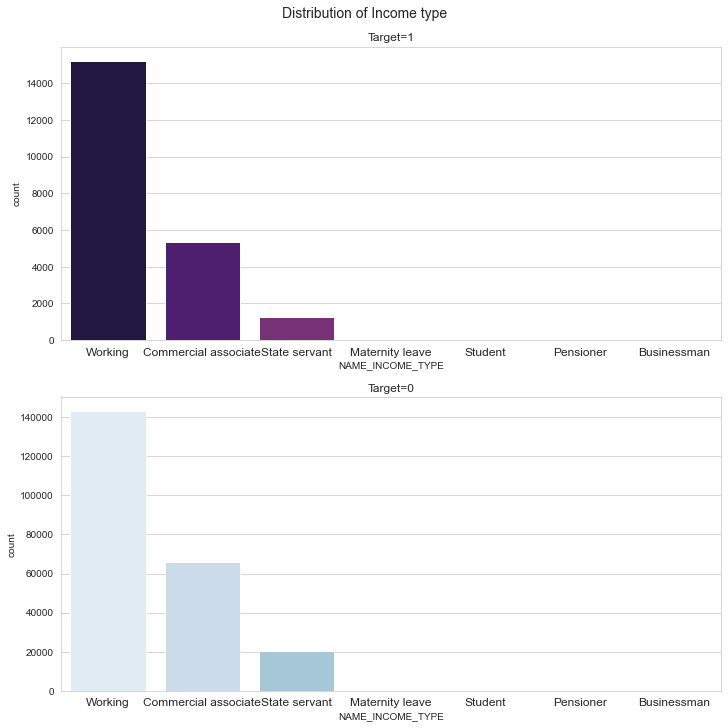

In [67]:
#Plotting the distribution of income type

sns.set_style('whitegrid')

fig, ax = plt.subplots(2,1,constrained_layout=True, figsize=(10,10))

ax[0].set_title('Target=1', fontsize=12)
ax[0].set_xticklabels(ax[0].get_xticklabels(),fontsize=12)
sns.countplot(data=target1_df,x='NAME_INCOME_TYPE',order=target1_df['NAME_INCOME_TYPE'].value_counts().index,
              palette='magma',ax=ax[0])

ax[1].set_title('Target=0',fontsize=12)
ax[1].set_xticklabels(ax[1].get_xticklabels(), fontsize=12)
sns.countplot(data=target0_df,x='NAME_INCOME_TYPE',order=target1_df['NAME_INCOME_TYPE'].value_counts().index,
              palette='Blues',ax=ax[1])


plt.suptitle('Distribution of Income type',fontsize=14)
plt.show()

##### Observation:
1. In both cases, working category is the highest. 

### Influence of occupation

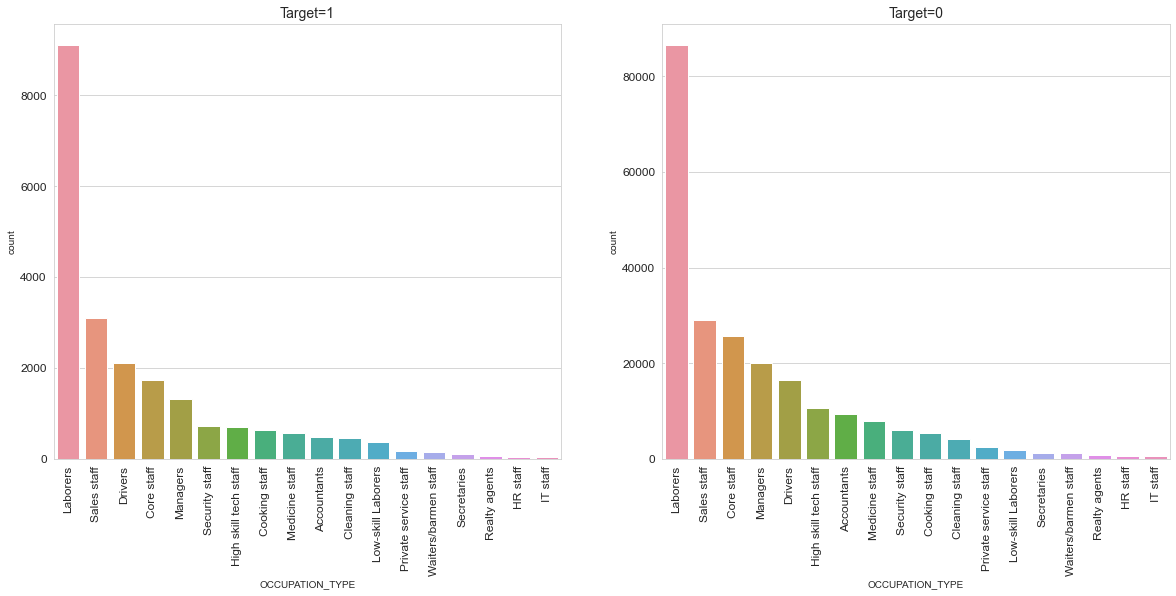

In [68]:
#Checking the influence of occupation on the target variable

plt.figure(figsize=(20,8)) 

plt.subplot(1,2,1)
ax = sns.countplot(target1_df['OCCUPATION_TYPE'],order=target1_df['OCCUPATION_TYPE'].value_counts().index)
plt.title('Target=1',fontsize=14)
plt.xticks(rotation=90,fontsize=12)
plt.yticks(rotation=0,fontsize=12)

plt.subplot(1,2,2)
ax = sns.countplot(target0_df['OCCUPATION_TYPE'],order=target0_df['OCCUPATION_TYPE'].value_counts().index)
plt.title('Target=0',fontsize=14)
plt.xticks(rotation=90,fontsize=12)
plt.yticks(rotation=0,fontsize=12)

plt.show()

##### Observations:
1. Laborers are the most likely to default a payment as they are highest in number. 
2. Top 3 occupations who default are 'Laborers', 'Sales Staff' and 'Drivers'.
3. Realty agents, HR staff and IT staff are the least likely to default.

### CATEGORICAL PLOTS

#### Creating a user defined function for ease of coding and less cluttering.

In [69]:
def univariate_plot_cat(col):    
    
    plt.figure(figsize=(8,6))
    
    plt.subplot(1,2,1)
    
    plt.title('Target=1',fontsize=14)
    plt.ylabel('xlabel',fontsize=12)
    plt.yticks(rotation=0,fontsize=12)
    plt.xticks(rotation=0,fontsize=12)
    
    sns.countplot(x=col,data=target1_df)
    
    plt.subplot(1,2,2)
    
    plt.title('Target=0',fontsize=14)
    plt.ylabel('xlabel',fontsize=12)
    plt.yticks(rotation=0,fontsize=12)
    plt.xticks(rotation=0,fontsize=12)
    
    sns.countplot(x=col,data=target0_df)
    
    plt.tight_layout()

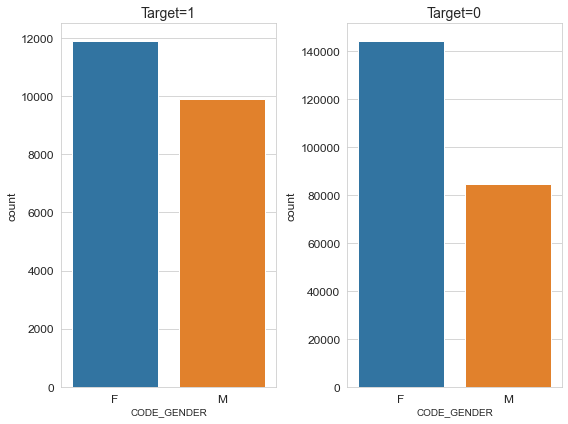

In [70]:
#Doing an univariate analysis on Gender of the client

univariate_plot_cat('CODE_GENDER')

##### Observations:
1. Difference in males and females in both categories is more or less the same.

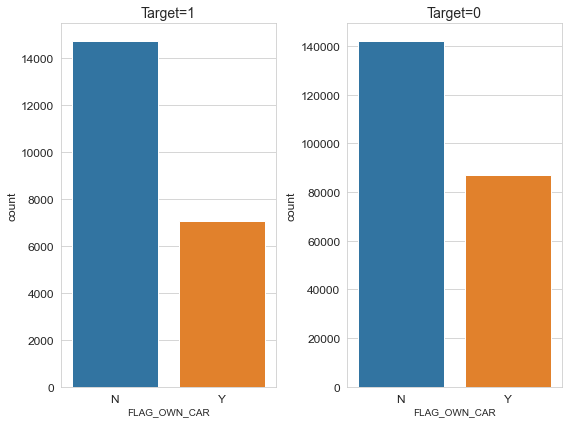

In [71]:
#Doing an univariate analysis on ownership of car

univariate_plot_cat('FLAG_OWN_CAR')

##### Observations:
1. In both cases, the difference in clients who didn't have a car and those who had a car is similar. 
2. It can be inferred that, owning a car doesn't affect payment difficulties.

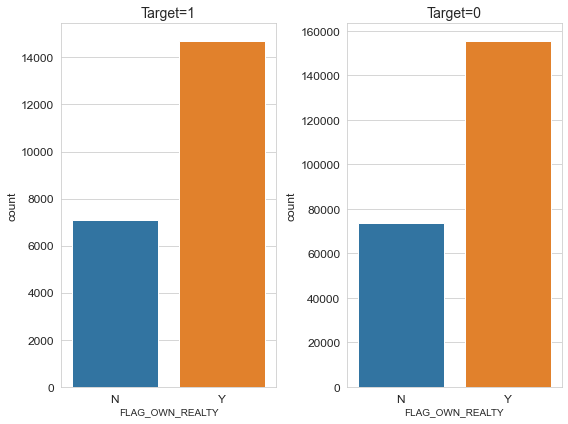

In [72]:
#Doing an univariate analysis on owning a realty

univariate_plot_cat('FLAG_OWN_REALTY')

##### Observations:
1. In both cases, the no. of clients who have their own realty is higher. 
2. It can be inferred that, owning a realty doesn't affect payment difficulties.

### Bivariate Analysis

### Housing Type

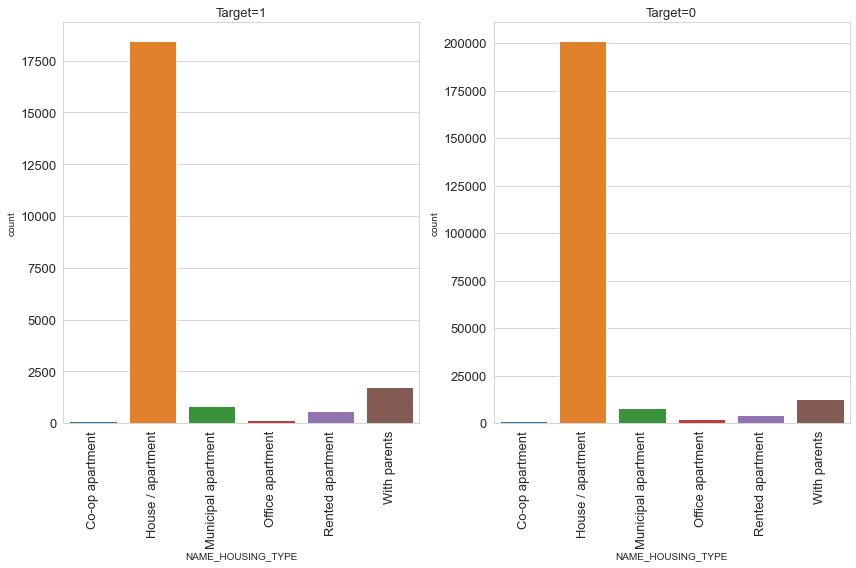

In [73]:
#Comparing the housing type in the two categories

plt.figure(figsize=(12,8))

plt.subplot(1,2,1)

plt.title('Target=1',fontsize=13)
plt.xticks(rotation=90,fontsize=13)
plt.yticks(rotation=0,fontsize=13)

sns.countplot(x='NAME_HOUSING_TYPE',data=target1_df)

plt.subplot(1,2,2)

plt.title('Target=0',fontsize=13)
plt.xticks(rotation=90,fontsize=13)
plt.yticks(rotation=0,fontsize=13)
sns.countplot(x='NAME_HOUSING_TYPE',data=target0_df)

plt.tight_layout()

##### Observations:
1. In both cases, clients who had a house/apartment are high. 
2. Clients who lived with their parents are second highest. This could be due to additional expenses for the parents.

### Family Status

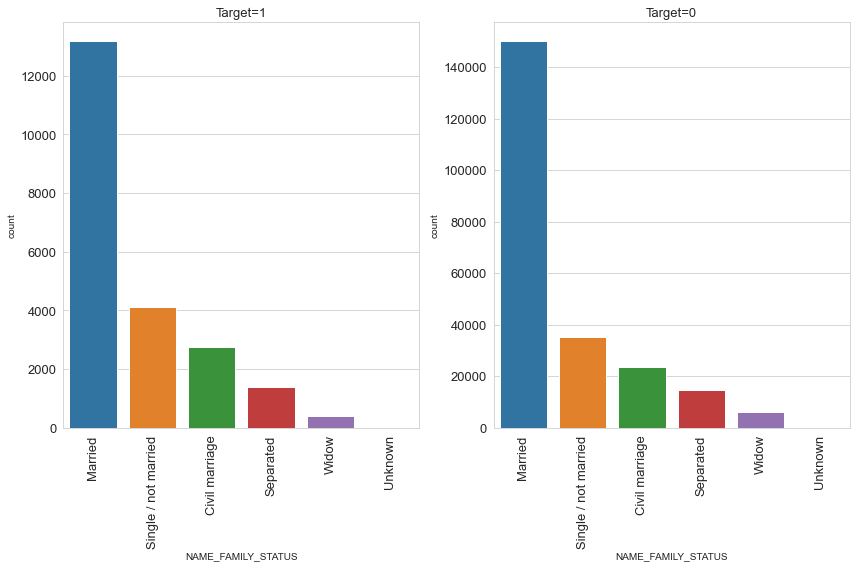

In [74]:
#Comparing the family status of clients in the two categories

plt.figure(figsize=(12,8))

plt.subplot(1,2,1)

plt.title('Target=1',fontsize=13)
plt.xticks(rotation=90,fontsize=13)
plt.yticks(rotation=0,fontsize=13)

sns.countplot(x='NAME_FAMILY_STATUS',data=target1_df,order=target0_df['NAME_FAMILY_STATUS'].value_counts().index)

plt.subplot(1,2,2)

plt.title('Target=0',fontsize=13)
plt.xticks(rotation=90,fontsize=13)
plt.yticks(rotation=0,fontsize=13)
sns.countplot(x='NAME_FAMILY_STATUS',data=target0_df,order=target0_df['NAME_FAMILY_STATUS'].value_counts().index)

plt.tight_layout()

##### Observations:
1. Married clients are more likely to default even though they are the highest in number in both categories.
2. Next most likely type of client to default is the single/not married clients.

### CORRELATION

In [75]:
#Selecting only the numeric columns and subsetting them into a new dataframe

target1_corr=target1_df.select_dtypes(np.number)
target1_corr=target1_corr.iloc[0:,2:]
target0_corr=target0_df.select_dtypes(np.number)
target0_corr=target0_corr.iloc[0:,2:]

In [76]:
#'Spearman' method simply finds the relation between two variables without assuming any distrubition

target1=target1_corr.corr(method='spearman')
target0=target0_corr.corr(method='spearman')

##### Since heatmap is a better visualization technique, the above two correlations are plotted in a heatmap.

### Correlation heatmap for Target = 1

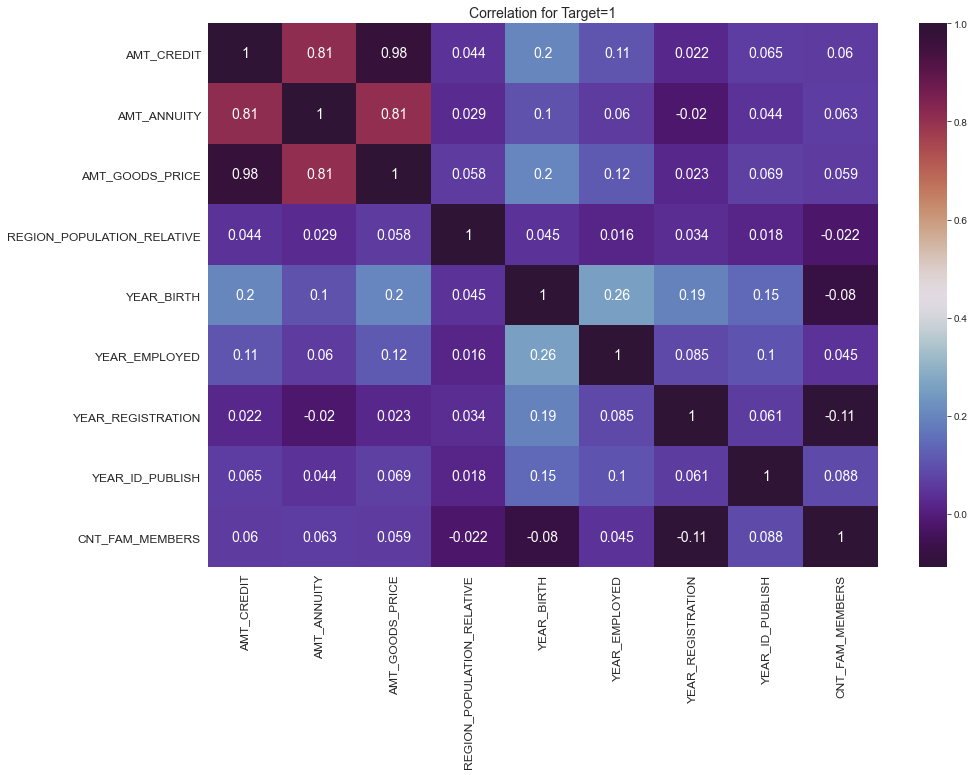

In [77]:
plt.figure(figsize=(15,10))
plt.title('Correlation for Target=1', fontsize=14)
sns.heatmap(target1,cmap='twilight_shifted',annot=True,annot_kws={"size":14})
plt.xticks(rotation=90, fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.show()

##### Observations:
1. AMT_ANNUITY has a high positive correlation with AMT_CREDIT.
2. AMT_CREDIT and AMT_ANNUITY has a positive correlation with AMT_INCOME_TOTAL.
3. AMT_CREDIT has a high positive correlation with AMT_GOODS_PRICE.
4. AMT_CREDIT has a positive correlation with YEAR_BIRTH.

### Correlation heatmap for Target = 0 

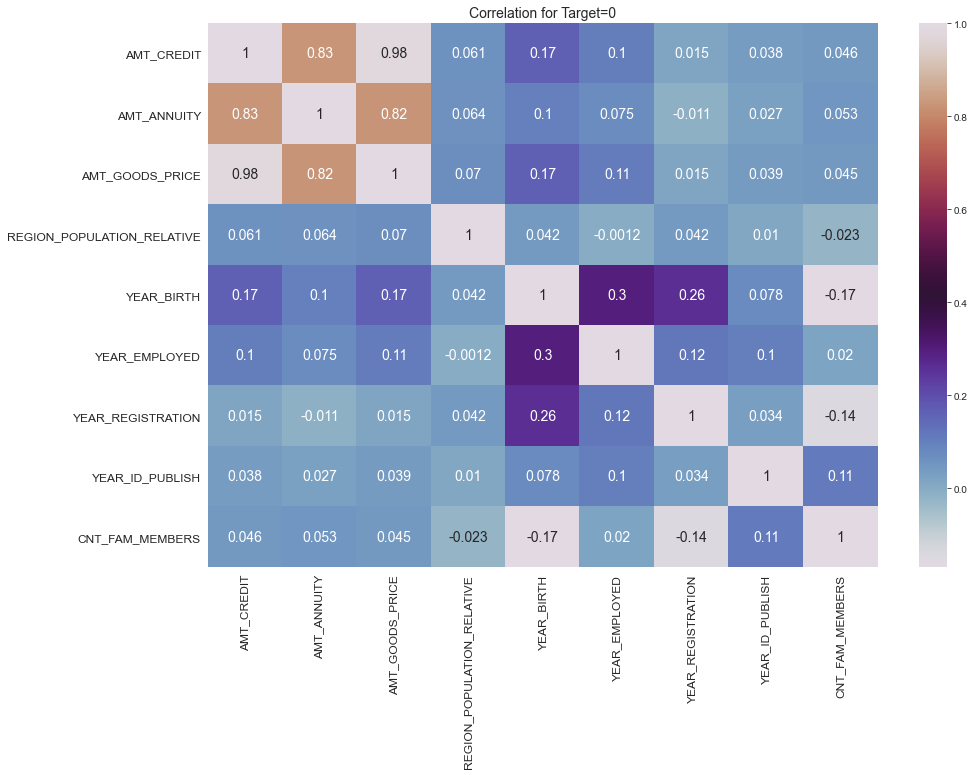

In [78]:
plt.figure(figsize=(15,10))
plt.title('Correlation for Target=0', fontsize=14)
sns.heatmap(target0,cmap='twilight',annot=True,annot_kws={"size":14})
plt.xticks(rotation=90, fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.show()

##### Observations:
1. AMT_ANNUITY has a high positive correlation with AMT_CREDIT.
2. AMT_CREDIT and AMT_ANNUITY has a positive correlation with AMT_INCOME_TOTAL.
3. AMT_CREDIT has a high positive correlation with AMT_GOODS_PRICE.
4. AMT_CREDIT has a positive correlation with YEAR_BIRTH.

### Plots in LOG scale

#### Creating a user defined function for ease of coding and less cluttering.

In [79]:
def univariate_plot_log(col):
    
    plt.figure(figsize=(12,8))
    
    plt.subplot(1,2,1)
    
    plt.title('Target=1',fontsize=14)
    plt.yscale('log')
    plt.ylabel('xlabel',fontsize=12)
    plt.yticks(rotation=0,fontsize=12)
    
    sns.boxplot(y=col,data=target1_df)
    
    plt.subplot(1,2,2)
    
    plt.title('Target=0',fontsize=14)
    plt.yscale('log')
    plt.ylabel('xlabel',fontsize=12)
    plt.yticks(rotation=0,fontsize=12)
    
    sns.boxplot(y=col, data=target0_df)
    
    plt.tight_layout()

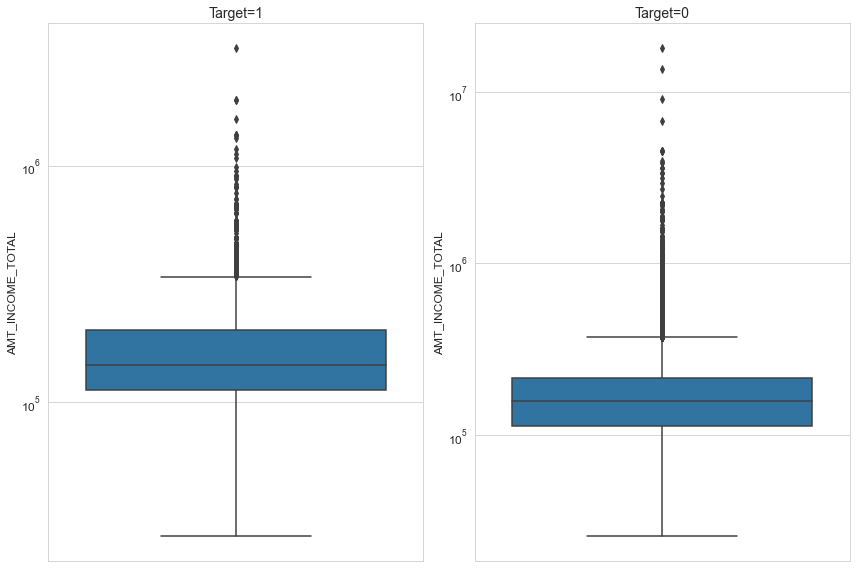

In [80]:
#Doing an univariate analysis for amount of income

univariate_plot_log(col='AMT_INCOME_TOTAL')

##### Observations:
1. The median of income in both categories look similar. 
2. The distribution of income for both categories are approximately the same.

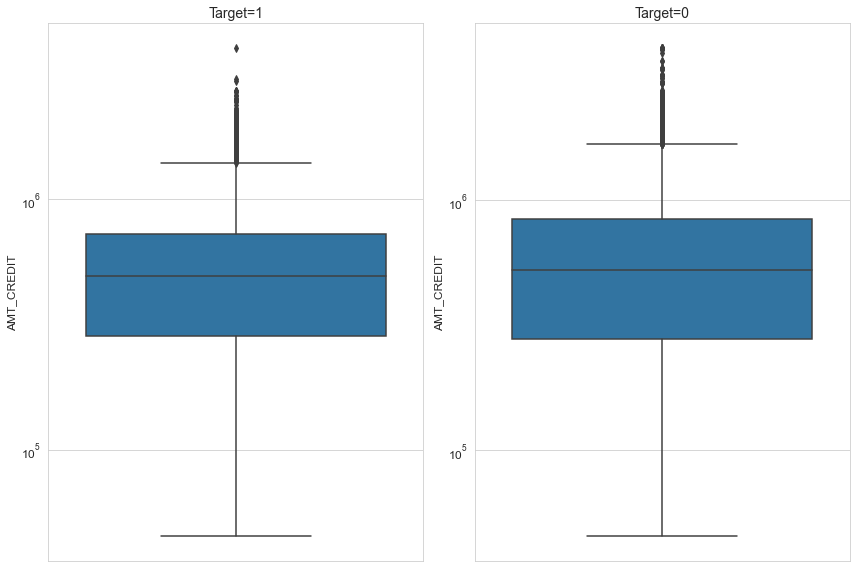

In [81]:
#Doing an univariate analysis on credit amount of the loan

univariate_plot_log(col='AMT_CREDIT')

##### Observations:
1. As seen with the amount of income, the credit amount of the loan is approximate similar for both the categories.

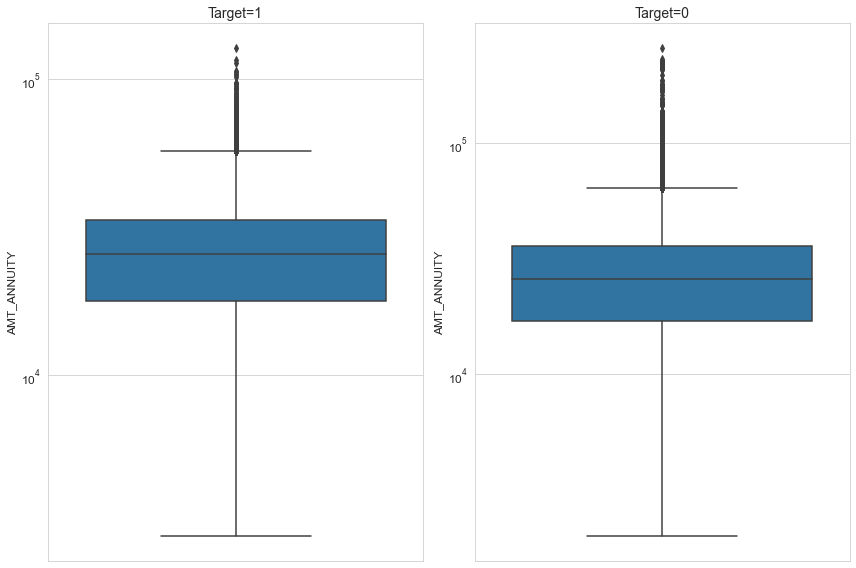

In [82]:
#Doing an univariate analysis on loan annuity

univariate_plot_log('AMT_ANNUITY')

##### Observations:
1. As seen with the previous two parameters, the values of loan annuity in both groups are quite similar and not a big differnece can be seen outright.

### Plots in normal scale

#### Creating a user defined function for ease of coding and less cluttering.

In [83]:
def univariate_plot(col):
    
    plt.figure(figsize=(12,8))
    
    plt.subplot(1,2,1)
    
    plt.title('Target=1',fontsize=14)
    plt.ylabel('xlabel',fontsize=12)
    plt.yticks(rotation=0,fontsize=12)
    
    sns.boxplot(y=col,data=target1_df)
    
    plt.subplot(1,2,2)
    
    plt.title('Target=0',fontsize=14)
    plt.ylabel('xlabel',fontsize=12)
    plt.yticks(rotation=0,fontsize=12)
    
    sns.boxplot(y=col, data=target0_df)
    
    plt.tight_layout()

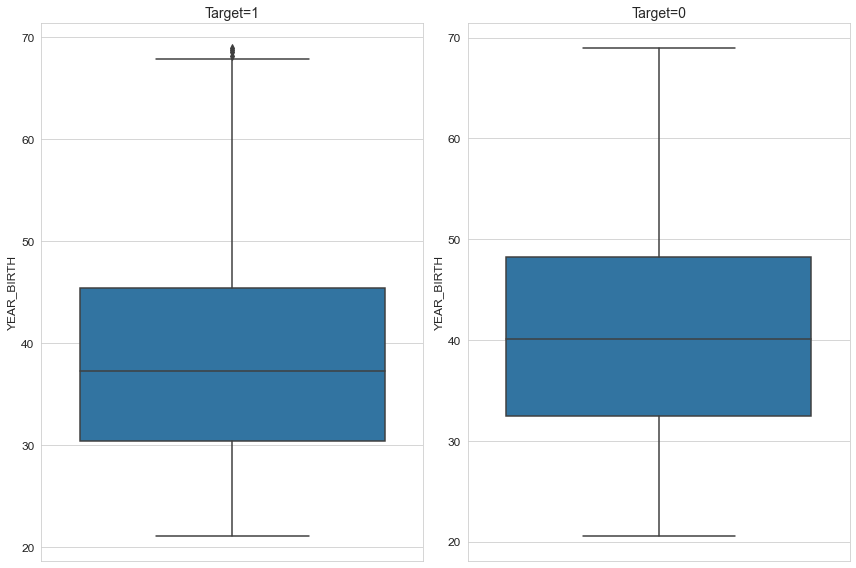

In [84]:
#Doing an univariate analysis on age of the customer at the time of application

univariate_plot('YEAR_BIRTH')

##### Observations:
1. The median age of customers who defaulted is slightly less, around 36 than those who didn't default whose median age is approximately 40.

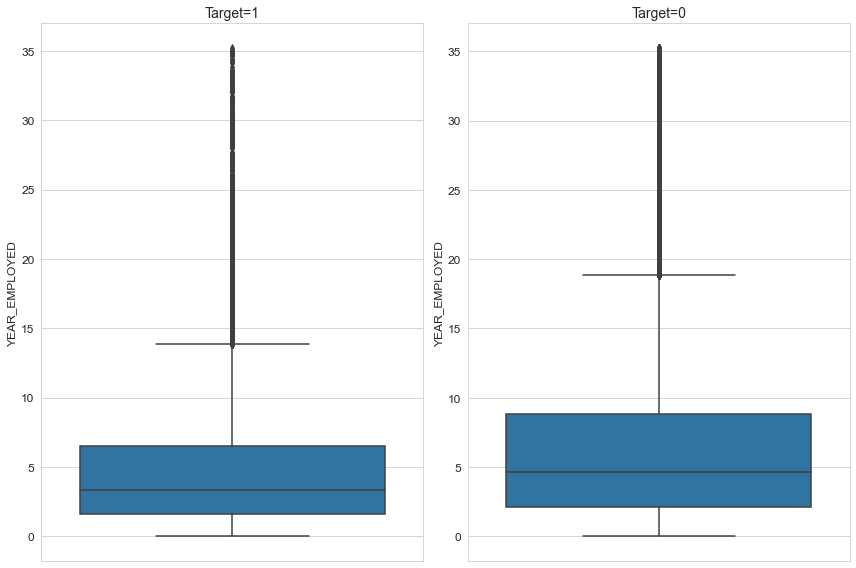

In [85]:
#Doing an univariate analysis on age of employment of customer at the time of application

univariate_plot('YEAR_EMPLOYED')

##### Observations:
1. Customers who defaulted are relatively less experienced at their current job, having a median around 3 years and upper whisker near to 15 years. 
2. Customers who had no difficulties in payment have a median age of 5 years and an upper whisker close to 20 years.

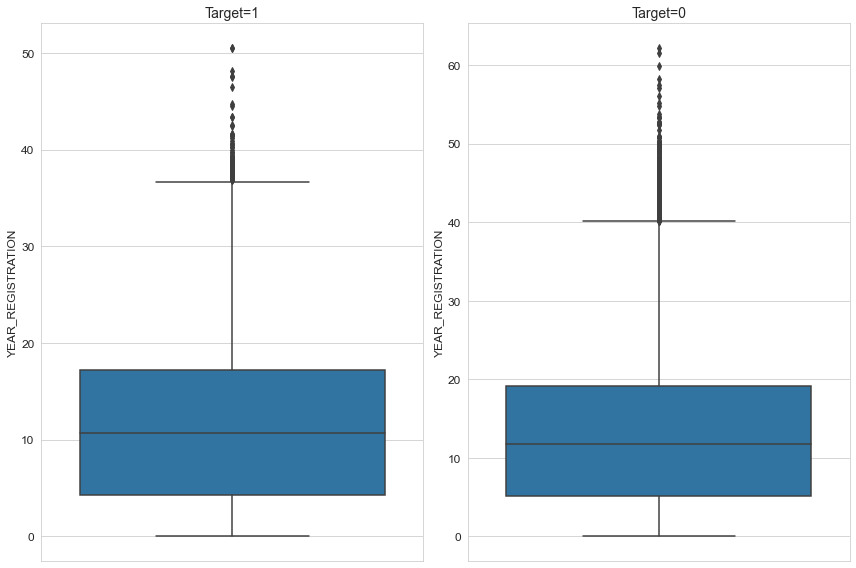

In [86]:
#Doing an univariate analysis on the no. of years before which the client changed their registration

univariate_plot('YEAR_REGISTRATION')

##### Observation:
1. In both cases, the median value is close to each other which can thought to be similar in nature.

### Bivariate analysis

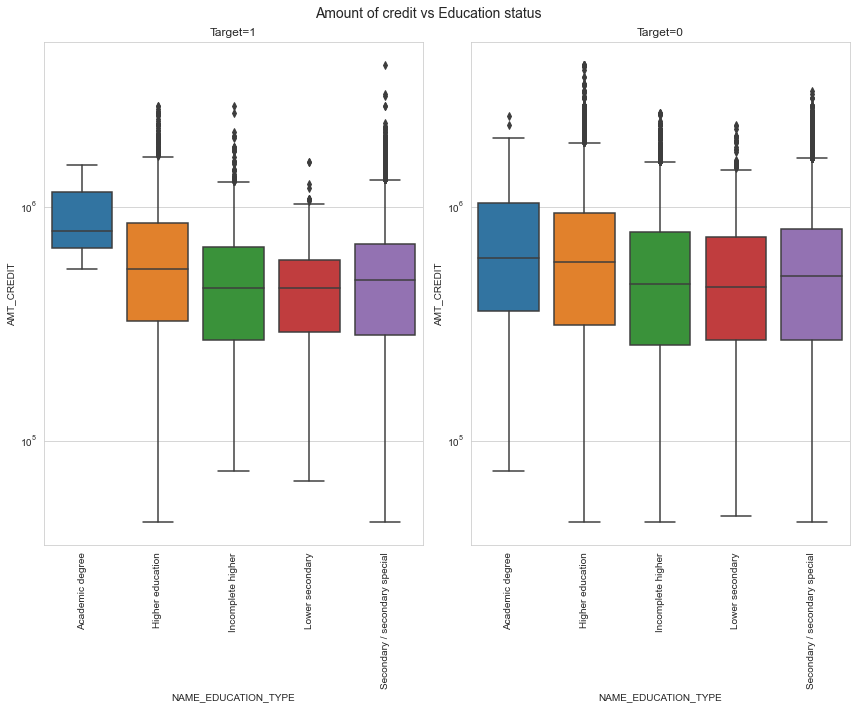

In [87]:
#Box plot for amount of credit vs education status and credit amount of the loan
    
plt.figure(figsize=(12,10))
    
plt.subplot(1,2,1)

plt.xticks(rotation=90,fontsize=10)
plt.yticks(rotation=0,fontsize=10)
plt.yscale('log')
plt.title('Target=1',fontsize=12)
sns.boxplot(data=target1_df,x='NAME_EDUCATION_TYPE',y='AMT_CREDIT',orient='v')

plt.subplot(1,2,2)

plt.xticks(rotation=90,fontsize=10)
plt.yticks(rotation=0,fontsize=10)
plt.yscale('log')
plt.title('Target=0',fontsize=12)
sns.boxplot(data=target0_df,x='NAME_EDUCATION_TYPE',y='AMT_CREDIT',orient='v')

plt.suptitle('Amount of credit vs Education status',fontsize=14)

plt.tight_layout()

##### Observations:
1. Customers with an academic degree have the highest credit amount in both categories.
2. Customers with the highest IQR in target = 1 are the higher education, secondary education and those with incomplete higher.

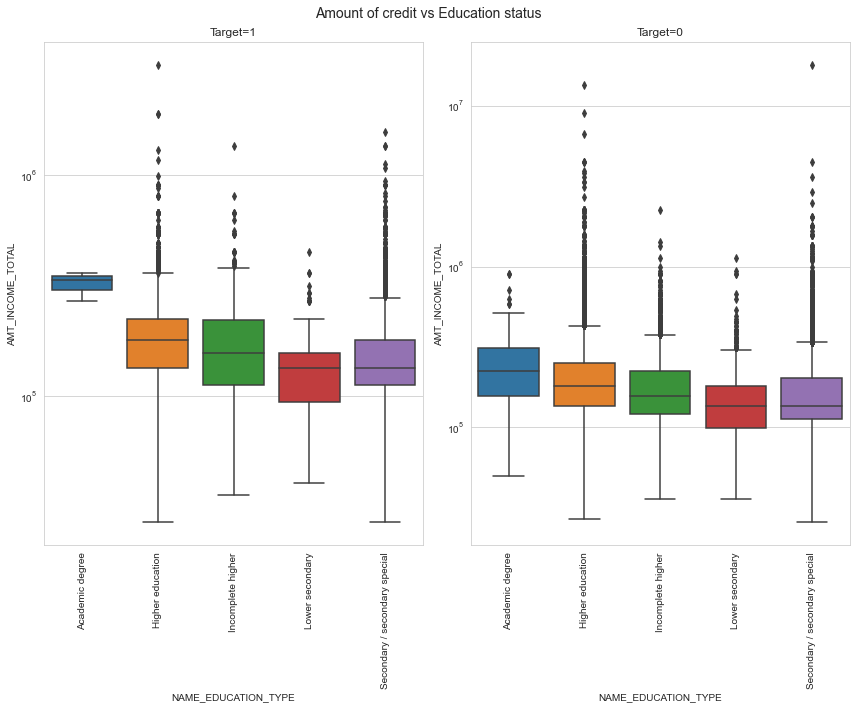

In [88]:
#Box plot for amount of income
    
plt.figure(figsize=(12,10))
    
plt.subplot(1,2,1)

plt.xticks(rotation=90,fontsize=10)
plt.yticks(rotation=0,fontsize=10)
plt.yscale('log')
plt.title('Target=1',fontsize=12)
sns.boxplot(data=target1_df,x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL',orient='v')

plt.subplot(1,2,2)

plt.xticks(rotation=90,fontsize=10)
plt.yticks(rotation=0,fontsize=10)
plt.yscale('log')
plt.title('Target=0',fontsize=12)
sns.boxplot(data=target0_df,x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL',orient='v')

plt.suptitle('Amount of credit vs Education status',fontsize=14)

plt.tight_layout()

##### Observations:
1. Clients with an academic degree get more credit amount for the loan and those with lower secondary degree get the least.
2. Those with higher education or an incomplete higher have great IQR in the target=1 category.
3. In the target=0, category, all categories have approximately the same IQR.

### Multivariate analysis

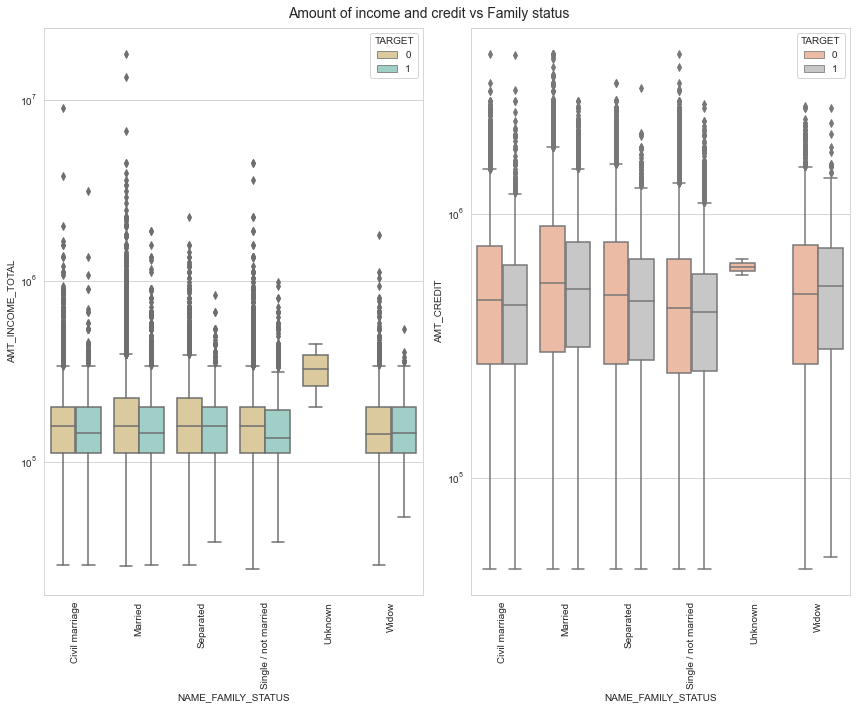

In [89]:
#Box plot for amount of income and amount of credit
    
plt.figure(figsize=(12,10))
    
plt.subplot(1,2,1)

plt.xticks(rotation=90,fontsize=10)
plt.yticks(rotation=0,fontsize=10)
plt.yscale('log')

sns.boxplot(data=df,x='NAME_FAMILY_STATUS',y='AMT_INCOME_TOTAL',hue='TARGET',orient='v',palette='BrBG')

plt.subplot(1,2,2)

plt.xticks(rotation=90,fontsize=10)
plt.yticks(rotation=0,fontsize=10)
plt.yscale('log')

sns.boxplot(data=df,x='NAME_FAMILY_STATUS',y='AMT_CREDIT',hue='TARGET',orient='v',palette='RdGy')

plt.suptitle('Amount of income and credit vs Family status',fontsize=14)

plt.tight_layout()

##### Observations:
1. The amount of income is more or less similar for both categories across all family status.
2. The amount of credit for the loan is also quite similar for both categories across all family status.

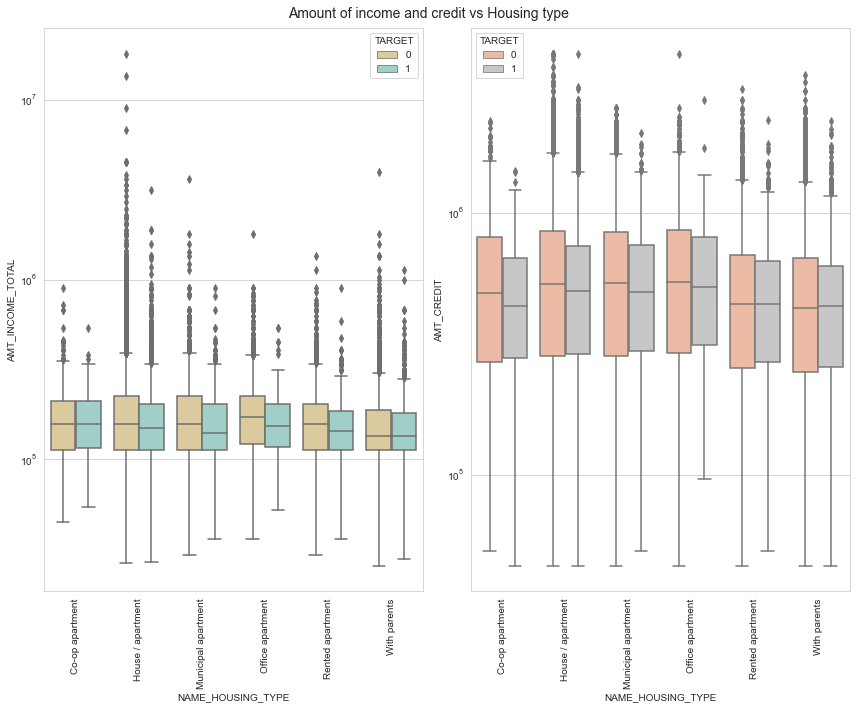

In [90]:
#Box plot for amount of income and amount of credit
    
plt.figure(figsize=(12,10))
    
plt.subplot(1,2,1)

plt.xticks(rotation=90,fontsize=10)
plt.yticks(rotation=0,fontsize=10)
plt.yscale('log')

sns.boxplot(data=df,x='NAME_HOUSING_TYPE',y='AMT_INCOME_TOTAL',hue='TARGET',orient='v',palette='BrBG')

plt.subplot(1,2,2)

plt.xticks(rotation=90,fontsize=10)
plt.yticks(rotation=0,fontsize=10)
plt.yscale('log')

sns.boxplot(data=df,x='NAME_HOUSING_TYPE',y='AMT_CREDIT',hue='TARGET',orient='v',palette='RdGy')

plt.suptitle('Amount of income and credit vs Housing type',fontsize=14)

plt.tight_layout()

#### Observation:
1. Clients across the different housing types have more or less similar income level in the two different categories (target=0 and target=1).
2. Clients across the different housing types have more or less simiar credit amount in the two different categories (target=0 and target=1).

### Reading the 'previous_application.csv' file

In [91]:
prev = pd.read_csv(r'C:\Users\Gowtham\Desktop\EDA Case Study\0.Input\previous_application.csv')

#### Inspecting the dataframe

In [92]:
prev.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
prev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [94]:
prev.describe(include='all')

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1670214,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1670214,1.670214e+06,1670214,1.670214e+06,774370.000000,5951.000000,5951.000000,1670214,1670214,1.670214e+06,1670214,1670214,849809,1670214,1670214,1670214,1670214,1670214,1.670214e+06,1670214,1.297984e+06,1670214,1669868,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
unique,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,7,NaN,2,NaN,NaN,NaN,NaN,25,4,NaN,4,9,7,4,28,5,3,8,NaN,11,NaN,5,17,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Cash loans,NaN,NaN,NaN,NaN,NaN,TUESDAY,NaN,Y,NaN,NaN,NaN,NaN,XAP,Approved,NaN,Cash through the bank,XAP,Unaccompanied,Repeater,XNA,POS,XNA,Credit and cash offices,NaN,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,747553,NaN,NaN,NaN,NaN,NaN,255118,NaN,1661739,NaN,NaN,NaN,NaN,922661,1036781,NaN,1033552,1353093,508970,1231261,950809,691011,1063666,719968,NaN,855720,NaN,517215,285990,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.923089e+06,2.783572e+05,NaN,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,NaN,1.248418e+01,NaN,9.964675e-01,0.079637,0.188357,0.773503,NaN,NaN,-8.806797e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.139511e+02,NaN,1.605408e+01,NaN,NaN,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,NaN,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,NaN,3.334028e+00,NaN,5.932963e-02,0.107823,0.087671,0.100879,NaN,NaN,7.790997e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.127443e+03,NaN,1.456729e+01,NaN,NaN,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,NaN,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,NaN,0.000000e+00,NaN,0.000000e+00,-0.000015,0.034781,0.373150,NaN,NaN,-2.922000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.000000e+00,NaN,0.000000e+00,NaN,NaN,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,NaN,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,NaN,1.000000e+01,NaN,1.000000e+00,0.000000,0.160716,0.715645,NaN,NaN,-1.300000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.000000e+00,NaN,6.000000e+00,NaN,NaN,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,NaN,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,NaN,1.200000e+01,NaN,1.000000e+00,0.051605,0.189122,0.835095,NaN,NaN,-5.810000e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000e+00,NaN,1.200000e+01,NaN,NaN,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,NaN,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,NaN,1.500000e+01,NaN,1.000000e+00,0.108909,0.193330,0.852537,NaN,NaN,-2.800000e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.200000e+01,NaN,2.400000e+01,NaN,NaN,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000


In [95]:
prev.shape

(1670214, 37)

In [96]:
prev.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_DOWN_PAYMENT               float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
RATE_DOWN_PAYMENT              float64
RATE_INTEREST_PRIMARY          float64
RATE_INTEREST_PRIVILEGED       float64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_TYPE_SUITE                 object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE             

In [97]:
#Removing columns that have more than 45% null values

prev_null_cols = (prev.isnull().sum()/len(prev))*100
prev_null_cols_major = prev_null_cols[prev_null_cols >= 45]
prev_null_cols_major

AMT_DOWN_PAYMENT            53.636480
RATE_DOWN_PAYMENT           53.636480
RATE_INTEREST_PRIMARY       99.643698
RATE_INTEREST_PRIVILEGED    99.643698
NAME_TYPE_SUITE             49.119754
dtype: float64

###### There are 5 columns with null values more than 50%, hence they need to be removed.

In [98]:
#Dropping the 5 columns

prev = prev.drop(columns=prev_null_cols_major.index)

In [99]:
prev.shape

(1670214, 32)

In [100]:
#Converting the data type from int to object as customer ID should not get manipulated

prev[['SK_ID_PREV','SK_ID_CURR']]=prev[['SK_ID_PREV','SK_ID_CURR']].astype('object')

In [101]:
#Checking for null values

(prev.isnull().sum()/len(prev))*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYPE               0.000000
CHANNEL_TYPE                    0.000000
SELLERPLACE_AREA                0.000000
NAME_SELLER_INDUSTRY            0.000000
CNT_PAYMENT                    22.286366
NAME_YIELD_GROUP

In [102]:
prev.AMT_ANNUITY.describe(include='all')

count    1.297979e+06
mean     1.595512e+04
std      1.478214e+04
min      0.000000e+00
25%      6.321780e+03
50%      1.125000e+04
75%      2.065842e+04
max      4.180581e+05
Name: AMT_ANNUITY, dtype: float64

In [103]:
#Calculating means and modes and determining which to impute for the missing data

#AMT_GOODS_PRICE

print('AMT_ANNUITY')
print(prev.AMT_ANNUITY.mode())
print(prev.AMT_ANNUITY.median())

#AMT_CREDIT

print('\nAMT_CREDIT')
print(prev.AMT_CREDIT.mode())
print(prev.AMT_CREDIT.median())

#AMT_GOODS_PRICE

print('\nAMT_GOODS_PRICE')
print(prev.AMT_GOODS_PRICE.mode())
print(prev.AMT_GOODS_PRICE.median())

#AMT_GOODS_PRICE

print('\nCNT_PAYMENT')
print(prev.CNT_PAYMENT.mode())
print(prev.CNT_PAYMENT.median())

#AMT_GOODS_PRICE

print('\nPRODUCT_COMBINATION')
print(prev.PRODUCT_COMBINATION.mode()) #only mode can be calculated since its a categorical variable

AMT_ANNUITY
0    2250.0
dtype: float64
11250.0

AMT_CREDIT
0    0.0
dtype: float64
80541.0

AMT_GOODS_PRICE
0    45000.0
dtype: float64
112320.0

CNT_PAYMENT
0    12.0
dtype: float64
12.0

PRODUCT_COMBINATION
0    Cash
dtype: object


In [104]:
# Imputing the null values with necessary values

prev.loc[prev["AMT_ANNUITY"].isnull(),"AMT_ANNUITY"] = prev["AMT_ANNUITY"].median()

prev.loc[prev["AMT_CREDIT"].isnull(),"AMT_CREDIT"] = prev["AMT_CREDIT"].mode()[0]

prev.loc[prev["AMT_GOODS_PRICE"].isnull(),"AMT_GOODS_PRICE"] = prev["AMT_GOODS_PRICE"].median()

prev.loc[prev["CNT_PAYMENT"].isnull(),"CNT_PAYMENT"] = prev["CNT_PAYMENT"].median()

prev.loc[prev["PRODUCT_COMBINATION"].isnull(),"PRODUCT_COMBINATION"] = prev["PRODUCT_COMBINATION"].mode()[0]

In [105]:
#Sanity check

(prev.isnull().sum()/len(prev))*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                     0.000000
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000000
AMT_GOODS_PRICE                 0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYPE               0.000000
CHANNEL_TYPE                    0.000000
SELLERPLACE_AREA                0.000000
NAME_SELLER_INDUSTRY            0.000000
CNT_PAYMENT                     0.000000
NAME_YIELD_GROUP

In [106]:
#Checking for value counts in this column

prev.NFLAG_INSURED_ON_APPROVAL.value_counts()/len(prev)

0.0    0.398468
1.0    0.198551
Name: NFLAG_INSURED_ON_APPROVAL, dtype: float64

In [107]:
#Imputing the missing data

prev.loc[prev["NFLAG_INSURED_ON_APPROVAL"].isnull(),"NFLAG_INSURED_ON_APPROVAL"] = prev["NFLAG_INSURED_ON_APPROVAL"].mode()[0]

In [108]:
#Sanity check

(prev.isnull().sum()/len(prev))*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                     0.000000
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000000
AMT_GOODS_PRICE                 0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYPE               0.000000
CHANNEL_TYPE                    0.000000
SELLERPLACE_AREA                0.000000
NAME_SELLER_INDUSTRY            0.000000
CNT_PAYMENT                     0.000000
NAME_YIELD_GROUP

In [109]:
#Finding out more columns that are unnecessary for the analysis and removing them

prev_unwanted_cols=prev.isnull().sum()[prev.isnull().sum()/len(prev)*100 > 40]
prev_unwanted_cols.index

Index(['DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION'],
      dtype='object')

In [110]:
prev = prev.drop(columns=prev_unwanted_cols.index)

In [111]:
#Sanity check

prev.isnull().sum()

SK_ID_PREV                     0
SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_ANNUITY                    0
AMT_APPLICATION                0
AMT_CREDIT                     0
AMT_GOODS_PRICE                0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
FLAG_LAST_APPL_PER_CONTRACT    0
NFLAG_LAST_APPL_IN_DAY         0
NAME_CASH_LOAN_PURPOSE         0
NAME_CONTRACT_STATUS           0
DAYS_DECISION                  0
NAME_PAYMENT_TYPE              0
CODE_REJECT_REASON             0
NAME_CLIENT_TYPE               0
NAME_GOODS_CATEGORY            0
NAME_PORTFOLIO                 0
NAME_PRODUCT_TYPE              0
CHANNEL_TYPE                   0
SELLERPLACE_AREA               0
NAME_SELLER_INDUSTRY           0
CNT_PAYMENT                    0
NAME_YIELD_GROUP               0
PRODUCT_COMBINATION            0
NFLAG_INSURED_ON_APPROVAL      0
dtype: int64

#### All null values have been removed or imputed, hence we can move to the next step.

In [112]:
#Merging the two datasets

all_df = pd.merge(left=df, right=prev, how='inner',on='SK_ID_CURR',suffixes='_x')

#### Inspecting the new dataframe

In [113]:
all_df.shape

(1135703, 52)

In [114]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1135703 entries, 0 to 1135702
Data columns (total 52 columns):
 #   Column                       Non-Null Count    Dtype   
---  ------                       --------------    -----   
 0   SK_ID_CURR                   1135703 non-null  object  
 1   TARGET                       1135703 non-null  category
 2   NAME_CONTRACT_TYPE_          1135703 non-null  category
 3   CODE_GENDER                  1135703 non-null  category
 4   FLAG_OWN_CAR                 1135703 non-null  category
 5   FLAG_OWN_REALTY              1135703 non-null  category
 6   CNT_CHILDREN                 1135703 non-null  int64   
 7   AMT_INCOME_TOTAL             1135703 non-null  float64 
 8   AMT_CREDIT_                  1135703 non-null  float64 
 9   AMT_ANNUITY_                 1135703 non-null  float64 
 10  AMT_GOODS_PRICE_             1135703 non-null  float64 
 11  NAME_INCOME_TYPE             1135703 non-null  category
 12  NAME_EDUCATION_TYPE         

In [115]:
all_df.describe(include='all')

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_,AMT_ANNUITY_,AMT_GOODS_PRICE_,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,YEAR_BIRTH,YEAR_EMPLOYED,YEAR_REGISTRATION,YEAR_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,AMT_INCOME_RANGE,AMT_CREDIT_RANGE,YEAR_BIRTH_RANGE,SK_ID_PREV,NAME_CONTRACT_TYPEx,AMT_ANNUITYx,AMT_APPLICATION,AMT_CREDITx,AMT_GOODS_PRICEx,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,NFLAG_INSURED_ON_APPROVAL
count,1135703.0,1135703.0,1135703,1135703,1135703,1135703,1.135703e+06,1.135703e+06,1.135703e+06,1.135703e+06,1.135703e+06,1135703,1135703,1135703,1135703,1.135703e+06,1.135703e+06,1.135703e+06,1.135703e+06,1.135703e+06,1135703,1.135703e+06,1135703,1135703,953154,1135703,1135703.0,1135703,1.135703e+06,1.135703e+06,1.135703e+06,1.135703e+06,1135703,1.135703e+06,1135703,1.135703e+06,1135703,1135703,1.135703e+06,1135703,1135703,1135703,1135703,1135703,1135703,1135703,1.135703e+06,1135703,1.135703e+06,1135703,1135703,1.135703e+06
unique,237542.0,2.0,2,2,2,2,NaN,NaN,NaN,NaN,NaN,6,5,5,6,NaN,NaN,NaN,NaN,NaN,18,NaN,57,20,17,3,1135703.0,4,NaN,NaN,NaN,NaN,7,NaN,2,NaN,25,4,NaN,4,9,4,27,5,3,8,NaN,11,NaN,5,17,NaN
top,265681.0,0.0,Cash loans,F,N,Y,NaN,NaN,NaN,NaN,NaN,Working,Secondary / secondary special,Married,House / apartment,NaN,NaN,NaN,NaN,NaN,Laborers,NaN,Business Entity Type 3,200000-225000,250000-300000,41-60,2097151.0,Consumer loans,NaN,NaN,NaN,NaN,WEDNESDAY,NaN,Y,NaN,XAP,Approved,NaN,Cash through the bank,XAP,Repeater,XNA,POS,XNA,Credit and cash offices,NaN,XNA,NaN,XNA,POS household with interest,NaN
freq,73.0,1029428.0,1044817,719750,706923,804757,NaN,NaN,NaN,NaN,NaN,721364,807831,749347,1001506,NaN,NaN,NaN,NaN,NaN,433574,NaN,304576,176180,110881,556581,1.0,525544,NaN,NaN,NaN,NaN,170863,NaN,1129543,NaN,663834,713048,NaN,709854,913991,826354,617517,495861,739039,460545,NaN,553055,NaN,347958,187043,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,4.942260e-01,1.795003e+05,5.986644e+05,2.775802e+04,5.373930e+05,NaN,NaN,NaN,NaN,2.073805e-02,4.097522e+01,6.605317e+00,1.266847e+01,7.737605e+00,NaN,2.262946e+00,NaN,NaN,NaN,NaN,NaN,NaN,1.487484e+04,1.735819e+05,1.954610e+05,1.984825e+05,NaN,1.265600e+01,NaN,9.963450e-01,NaN,NaN,-8.856112e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.239473e+02,NaN,1.477068e+01,NaN,NaN,1.867354e-01
std,NaN,NaN,NaN,NaN,NaN,NaN,7.637644e-01,1.066383e+05,3.856013e+05,1.401752e+04,3.537783e+05,NaN,NaN,NaN,NaN,1.331721e-02,9.904221e+00,6.033031e+00,8.936395e+00,4.155904e+00,NaN,9.335055e-01,NaN,NaN,NaN,NaN,NaN,NaN,1.342707e+04,2.965361e+05,3.227920e+05,2.854613e+05,NaN,3.360217e+00,NaN,6.034608e-02,NaN,NaN,7.832751e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.694429e+03,NaN,1.278311e+01,NaN,NaN,3.896992e-01
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,2.565000e+04,4.500000e+04,1.980000e+03,4.050000e+04,NaN,NaN,NaN,NaN,2.900000e-04,2.051781e+01,0.000000e+00,0.000000e+00,0.000000e+00,NaN,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00,NaN,0.000000e+00,NaN,NaN,-2.922000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.000000e+00,NaN,0.000000e+00,NaN,NaN,0.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,1.125000e+05,2.842560e+05,1.746900e+04,2.475000e+05,NaN,NaN,NaN,NaN,1.003200e-02,3.287945e+01,2.304110e+00,4.997260e+00,4.172603e+00,NaN,2.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,7.206705e+03,2.065500e+04,2.576700e+04,6.295500e+04,NaN,1.000000e+01,NaN,1.000000e+00,NaN,NaN,-1.321000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.000000e+00,NaN,8.000000e+00,NaN,NaN,0.000000e+00
50%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,1.575000e+05,5.212800e+05,2.5960

In [116]:
(len(all_df[all_df.NAME_GOODS_CATEGORY=='XNA'])/len(all_df))*100

54.37310634910711

##### Since there is 54% of XNA values, it's best to remove the column

In [117]:
all_df.drop(columns='NAME_GOODS_CATEGORY',inplace=True)

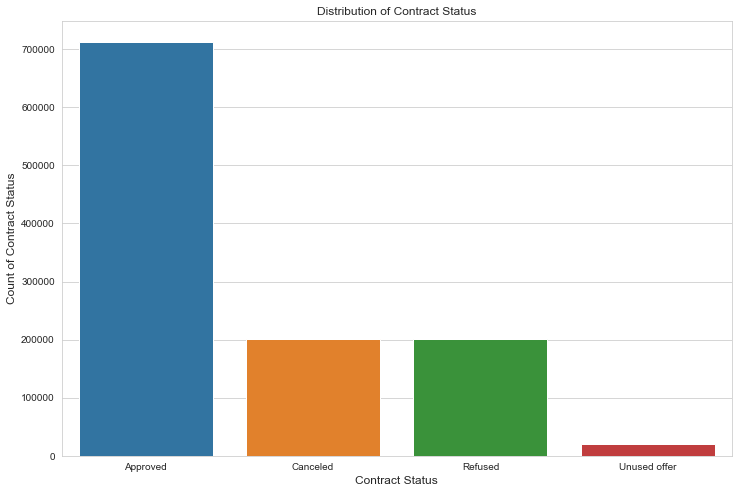

In [139]:
#Checking the distribution of  Contract status

plt.figure(figsize=(12,8))

sns.countplot(all_df['NAME_CONTRACT_STATUS'])

plt.xlabel("Contract Status",fontsize=12)
plt.xticks(rotation=0,fontsize=10)

plt.ylabel("Count of Contract Status",fontsize=12)
plt.yticks(rotation=0,fontsize=10)

plt.title("Distribution of Contract Status",fontsize=12)

plt.show()

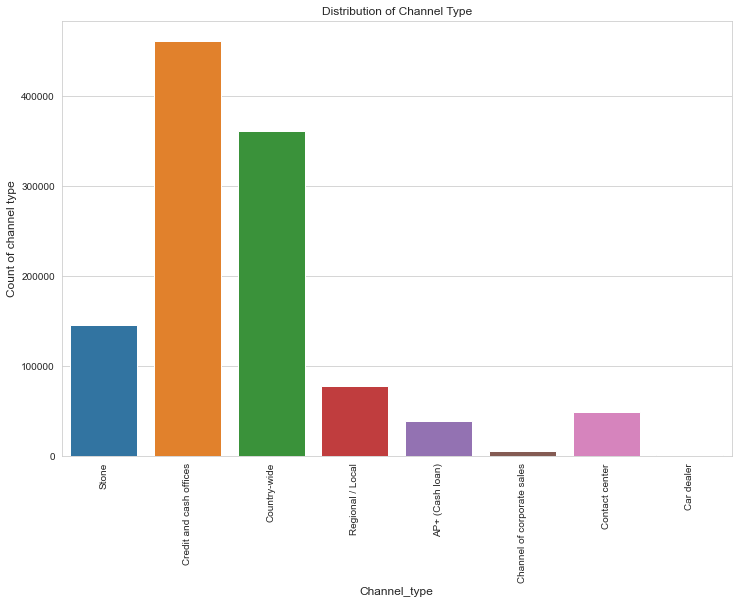

In [141]:
#Checking the distribution of  Channel type

plt.figure(figsize=(12,8))

sns.countplot(all_df['CHANNEL_TYPE'])

plt.xlabel("Channel_type",fontsize=12)
plt.xticks(rotation=90,fontsize=10)

plt.ylabel("Count of channel type",fontsize=12)
plt.yticks(rotation=0,fontsize=10)

plt.title("Distribution of Channel Type",fontsize=12)

plt.show()

#### Separating the dataframe into four categories based on the contract status for further analysis

In [119]:
approved_df = all_df[all_df['NAME_CONTRACT_STATUS']=='Approved']
refused_df = all_df[all_df['NAME_CONTRACT_STATUS']=='Refused']
canceled_df = all_df[all_df['NAME_CONTRACT_STATUS']=='Canceled']
unused_df = all_df[all_df['NAME_CONTRACT_STATUS']=='Unused offer']

In [120]:
all_df['NAME_CONTRACT_TYPEx'].value_counts()

Consumer loans     525544
Cash loans         471869
Revolving loans    137997
XNA                   293
Name: NAME_CONTRACT_TYPEx, dtype: int64

In [121]:
#Replacing the 'XNA' values, thought miniscule, with the mode of the column

all_df.loc[all_df['NAME_CONTRACT_TYPEx']== "XNA",'NAME_CONTRACT_TYPEx']= all_df['NAME_CONTRACT_TYPEx'].mode()[0]

In [122]:
all_df['NAME_CONTRACT_TYPEx'].isnull().sum()

0

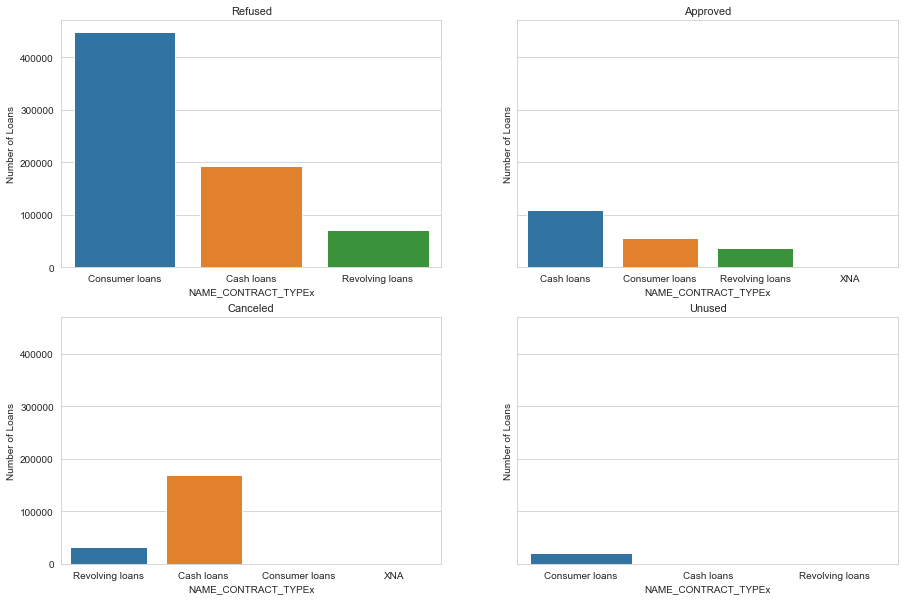

In [123]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2,ncols=2, figsize=(15,10),sharey=True)

ax1 = sns.countplot(ax=ax1,data=approved_df,x='NAME_CONTRACT_TYPEx')

ax1.set_title("Refused", fontsize=11)
ax1.set_xlabel('NAME_CONTRACT_TYPEx')
ax1.set_ylabel("Number of Loans")

ax2 = sns.countplot(ax=ax2,data=refused_df,x='NAME_CONTRACT_TYPEx')

ax2.set_title("Approved", fontsize=11)
ax2.set_xlabel('NAME_CONTRACT_TYPEx')
ax2.set_ylabel("Number of Loans")

ax3 = sns.countplot(ax=ax3,data=canceled_df,x='NAME_CONTRACT_TYPEx')

ax3.set_title("Canceled", fontsize=11)
ax3.set_xlabel('NAME_CONTRACT_TYPEx')
ax3.set_ylabel("Number of Loans")

ax4 = sns.countplot(ax=ax4,data=unused_df,x='NAME_CONTRACT_TYPEx')

ax4.set_title("Unused", fontsize=11)
ax4.set_xlabel('NAME_CONTRACT_TYPEx')
ax4.set_ylabel("Number of Loans")

plt.show()

##### Observations:
1. Consumer loans are more likely to be rejected.
2. Cash loans are the most approved form of loan.
3. Some of the cash loans are even cancelled but still the most approved.

In [124]:
#Defining a user defined function for ease in coding and plotting

def multi_plot(col_name):
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2,ncols=2, figsize=(15,12), sharey='all')
    fig.tight_layout(pad=10.0)

    ax1 = sns.countplot(ax=ax1,data=approved_df,x=col_name)
    ax1.set_title("Refused", fontsize=10)
    ax1.set_ylabel("Number of Loans")
    ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)

    ax2 = sns.countplot(ax=ax2,data=refused_df,x=col_name)
    ax2.set_title("Approved", fontsize=10)
    ax2.set_ylabel("Number of Loans")
    ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)

    ax3 = sns.countplot(ax=ax3,data=canceled_df,x=col_name)
    ax3.set_title("Canceled", fontsize=10)
    ax3.set_xlabel(col_name)
    ax3.set_ylabel("Number of Loans")
    ax3.set_xticklabels(ax3.get_xticklabels(),rotation=90)

    ax4 = sns.countplot(ax=ax4,data=unused_df,x=col_name)
    ax4.set_title("Unused", fontsize=10)
    ax4.set_xlabel(col_name)
    ax4.set_ylabel("Number of Loans")
    ax4.set_xticklabels(ax4.get_xticklabels(),rotation=90)
    
    plt.tight_layout()
    plt.show()

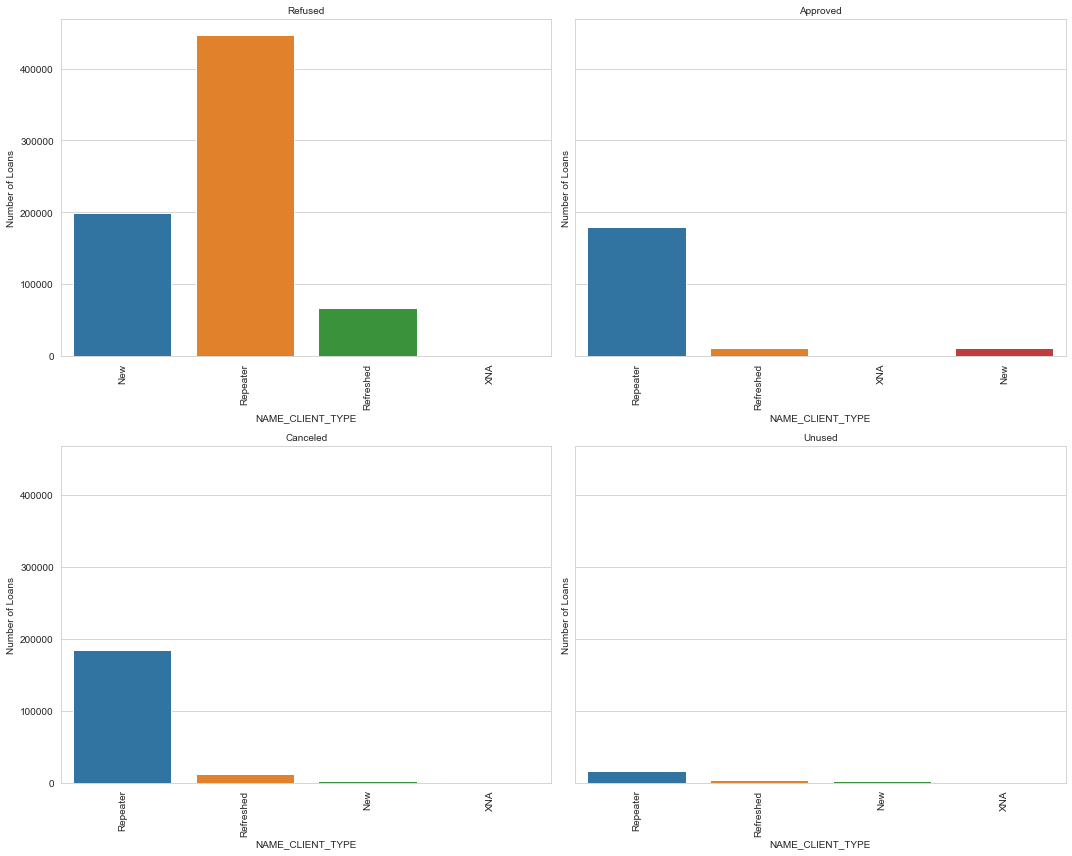

In [125]:
multi_plot('NAME_CLIENT_TYPE')

##### Observations:
1. New customers seem to be rejected by the bank. This could be because of insufficent data or low credit score.
2. Customers who are repeaters seem to get approved by the bank more than other type of customers.

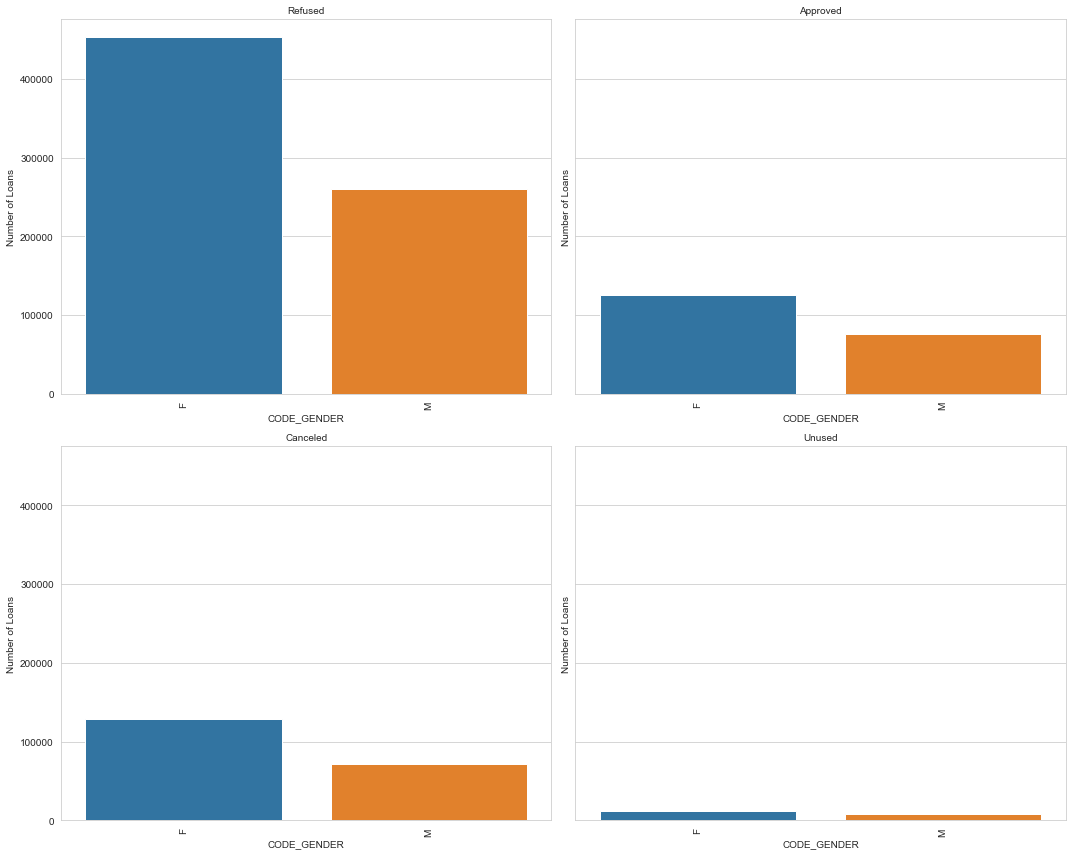

In [126]:
multi_plot('CODE_GENDER')

##### Observations:
1. Females are rejected more than males.
2. Contradictingly, more female clients are approved when compared to males.

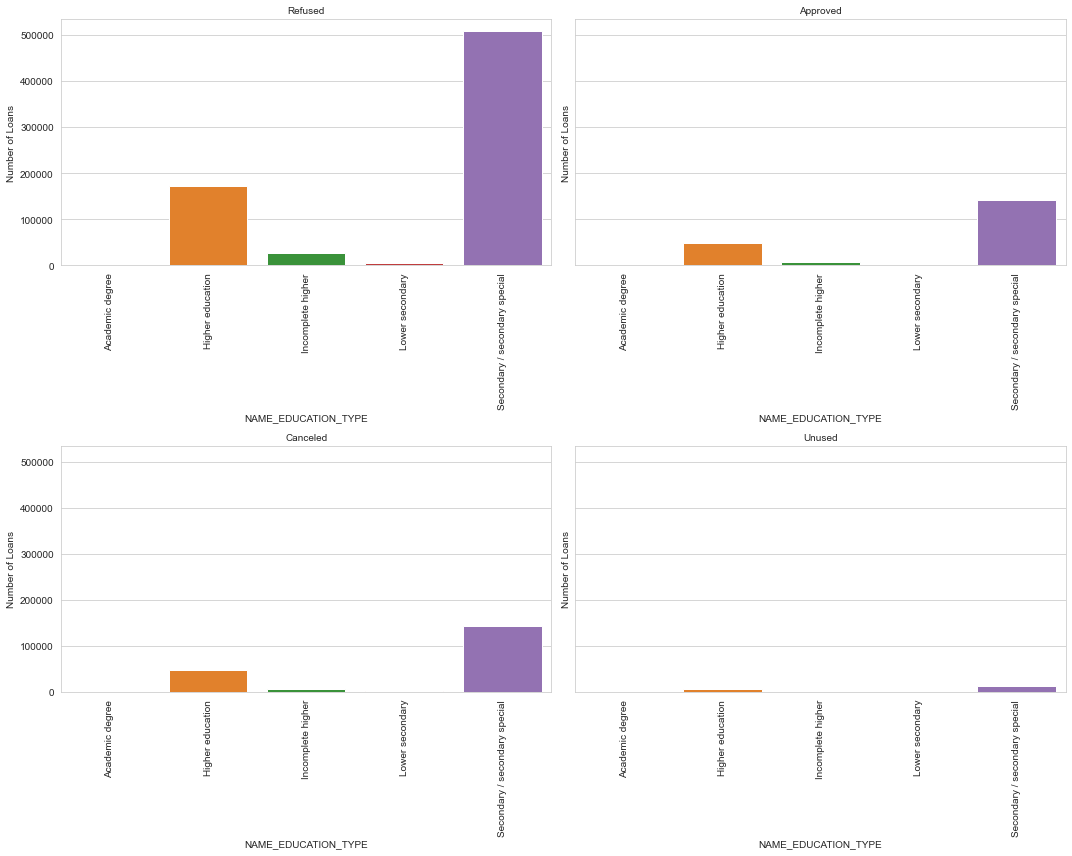

In [127]:
multi_plot('NAME_EDUCATION_TYPE')

##### Observations:
1. Those with secondary/secondary special educationa are rejected the most but also approved the most.
2. Clients with higher education are the second most highest in no. of approvals and no. of of rejections.

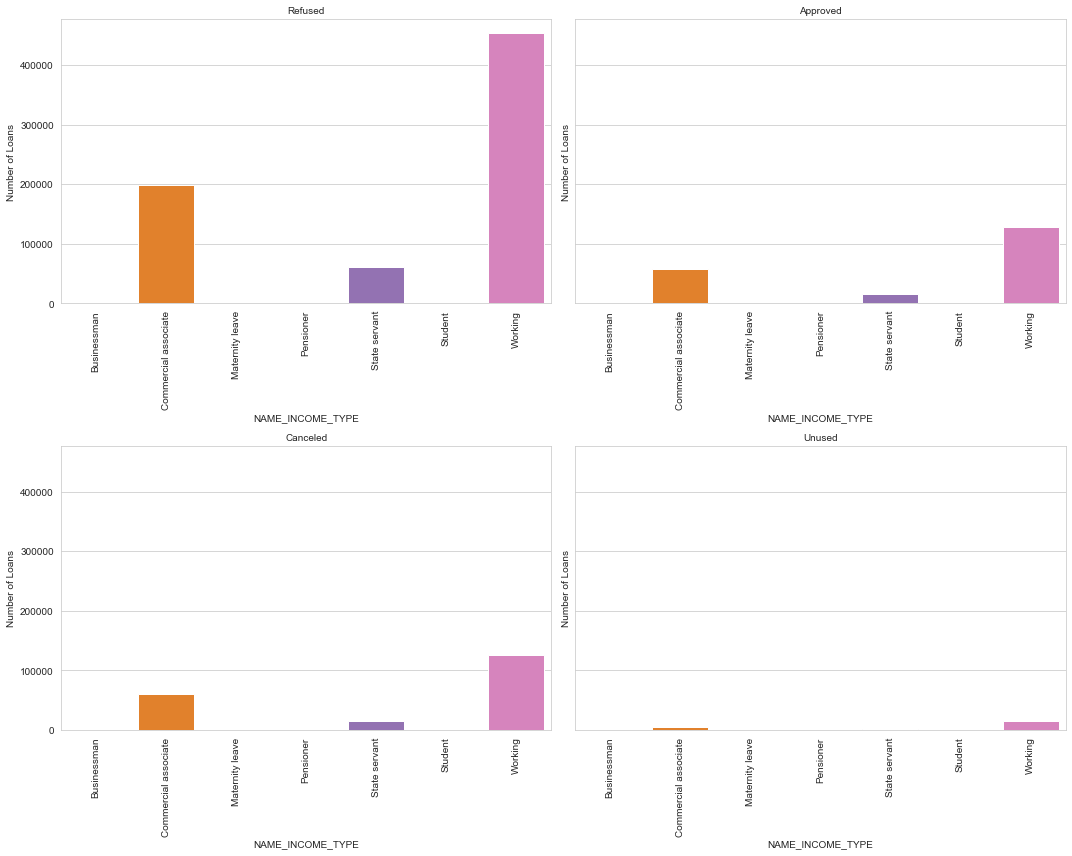

In [128]:
multi_plot('NAME_INCOME_TYPE')

##### Observations:
1. Working category customers are the most to be rejected, next highest is commerical associate.

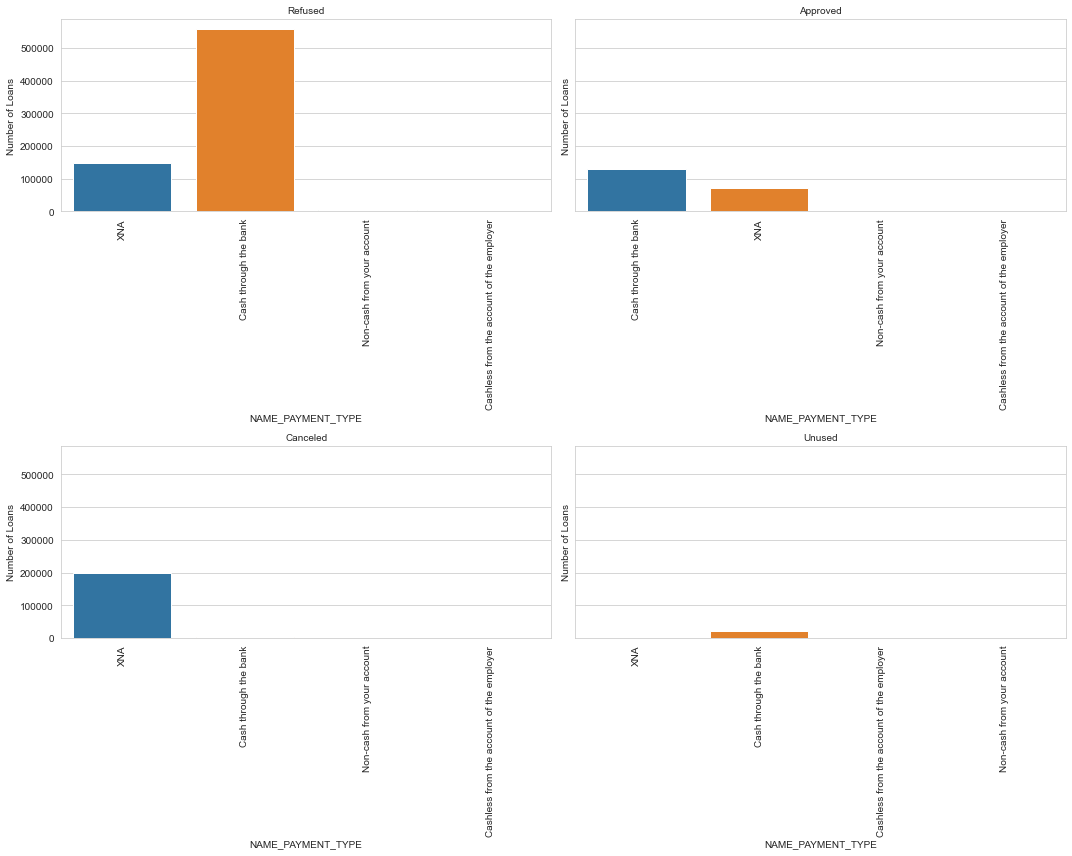

In [129]:
multi_plot('NAME_PAYMENT_TYPE')

##### Observations:
1. From the above plot, it can be seen that 'cash through the bank' is the most popular for of payment as it is the most rejected but also the most approved method of payment.

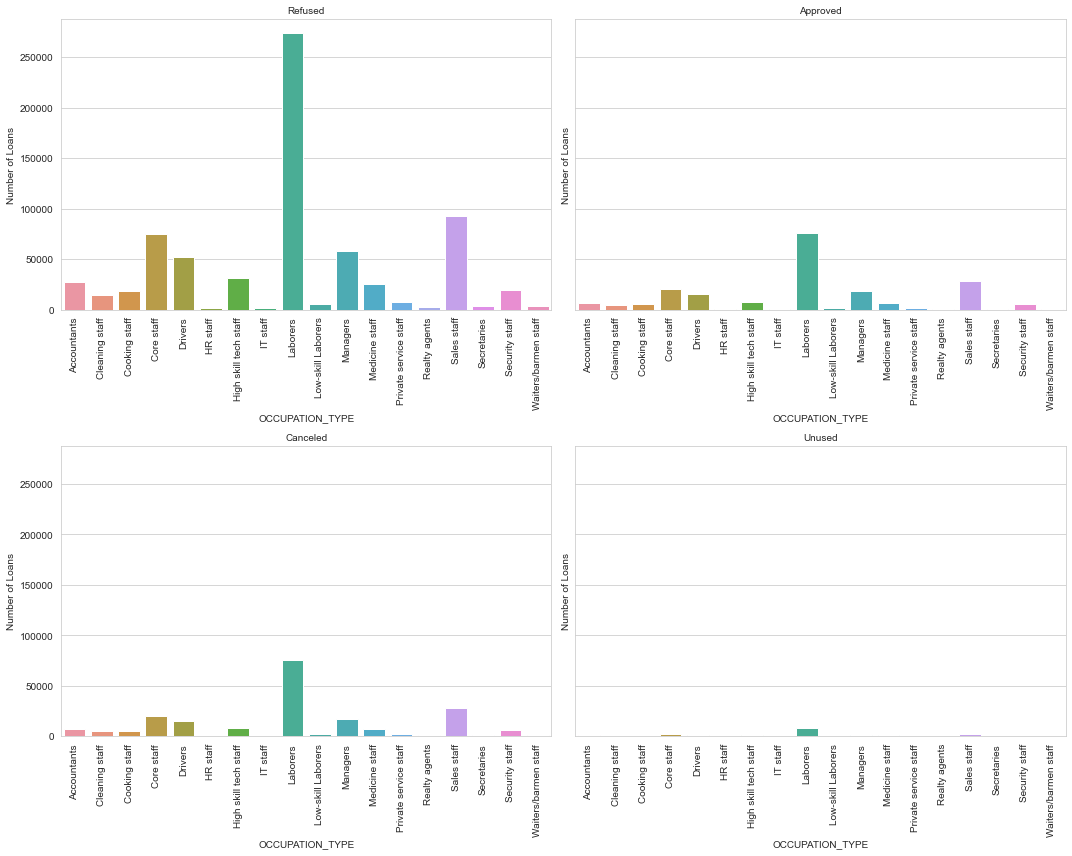

In [130]:
multi_plot('OCCUPATION_TYPE')

##### Observations:
1. Laborers are the most no. of clients who are defaulting and even here it can be seen that their applications are the most refused. 

### Final observations:

1. Banks should focus more on customers who are 'Businessmen' and 'Students'. 
2. Customers who are not living with their parents or not living in house/apartment category is preferred.
3. They should avoid clients in the age 18-40 as they are more likely to default and those who are married.
4. Customers who are new to their job or have low experince possess some risk.
5. Customers with a secondary degree or an incomplete higher degree are likely to default and can cause loss to the bank.
6. Banks can avoid giving loans to Laborers and focus on HR Staff and IT Staff.
7. They should also focus on giving loans to existing customers and also should avoid giving consumer loans.
8. Banks can approach through credit and cash offices.